In [9]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from scipy.stats import pearsonr
from scipy.spatial import distance
# from scipy.spatial
from scipy.stats.mstats import gmean
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess 
from skmisc.loess import loess
%matplotlib inline
from itertools import combinations
from itertools import chain
from itertools import product
import statsmodels
from sklearn.manifold import TSNE
# import umap

from adjustText import adjust_text

from multiprocessing import Pool
import sys
import os
import copy
sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

# fgm_simulation_path = '/Users/grantkinsler/Documents/Stanford/Research/StarryNight/Git/starry-night/Simulations/FGM_simulation_callable.py'
# sys.path.append(os.path.dirname(os.path.expanduser(fgm_simulation_path)))
# from FGM_simulation_callable import simulation, nball_pull, gaussian_fitness

tools_path = '../code/tools.py'
graphs_path = '../code/graphs.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
sys.path.append(os.path.dirname(os.path.expanduser(graphs_path)))
import tools
import graphs
from tools import mutant_colorset
from tools import condition_colorset
from tools import renamed_conditions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
fitness_data = p.read_csv('../data/fitness_weighted_allconditions_swapsremoved.csv')

sorted_m3_cols =   ['M3_Batch_23_fitness', '19_fitness', 'M3_Batch_18_fitness',
       'M3_Batch_20_fitness', 'M3_Batch_3_fitness', 'M3_Batch_13_fitness',
       'M3_Batch_6_fitness', '1BB_M3_fitness', 'M3_Batch_21_fitness']

sorted_nonm3_cols = ['1BB_1.4%Gluc_fitness', 'Ferm_44hr_Transfer_fitness',
       '1BB_1%Gly_fitness', '1BB_1.8%Gluc_fitness', '1BB_0.5%Raf_fitness',
       'Geldanamycin8.5uM_fitness', 'Ferm_40hr_Transfer_fitness',
       '1BB_Baffle_fitness', '1.5%_fitness', 'DMSO_fitness',
       '1BB_1%Raf_fitness', '1.7%_fitness', '1.6%_fitness',
       'Ferm_50hr_Transfer_fitness', '1.4%_fitness', '1BB_2ugFlu_fitness',
       'Ferm_54hr_Transfer_fitness', 'Resp_3Day_Transfer_fitness',
       '1BB_17uMGdA_fitness', '1.8%_fitness',
       'Resp_24hr_Transfer_fitness', '1BB_1%EtOH_fitness',
       '1BB_8.5uMGdA_fitness', '1BB_SucRaf_fitness', '2.5%_fitness',
       'Resp_4Day_Transfer_fitness', 'Resp_5Day_Transfer_fitness',
       '1BB_0.2MNaCl_fitness', '1BB_0.2MKCl_fitness',
       '1BB_0.5ugFlu_fitness', 'Ben0.4_fitness', 'Ben2_fitness',
       'Resp_6Day_Transfer_fitness', 'Resp_7Day_Transfer_fitness',
       '1BB_0.5MKCl_fitness', '1BB_0.5MNaCl_fitness']

first_nonsubtle = 16


20 200 1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


1 0.04680904111495088
2 0.6913763435470827
3 0.7209613153761825
4 0.7179249896973129
5 0.7233401699222404
6 0.7433439814396183
7 0.765456899027626
8 0.733449317983184
9 0.741598819441503
10 0.7375812536829802
11 0.7365516694987497
12 0.6974775472246437
13 0.6922845384722482
14 0.6932722394808665
15 0.6968171847080626
16 0.6719295935796071
17 0.6744309051160939
18 0.659457726621145
19 0.654138621538267
20 0.6451462279421967
21 0.6015164011431107
22 0.5930297243541925
23 0.5630772804249127
24 0.5455076678711204
25 0.5295394372989509
1 0.09602252684925694
2 0.7159757028976054
3 0.7390747340762682
4 0.7393182148313808
5 0.7420238350346815
6 0.7413303861813598
7 0.7528145424245876
8 0.7581217110722811
9 0.7501381403013445
10 0.7473590888944799
11 0.7503296637623531
12 0.74027168640359
13 0.7521288491085095
14 0.7470949896856081
15 0.7449281170889912
16 0.7287424156091357
17 0.7049340930391095
18 0.7004447968780536
19 0.6504480988590415
20 0.6338152840873108
21 0.6147767050709275
22 0.601255

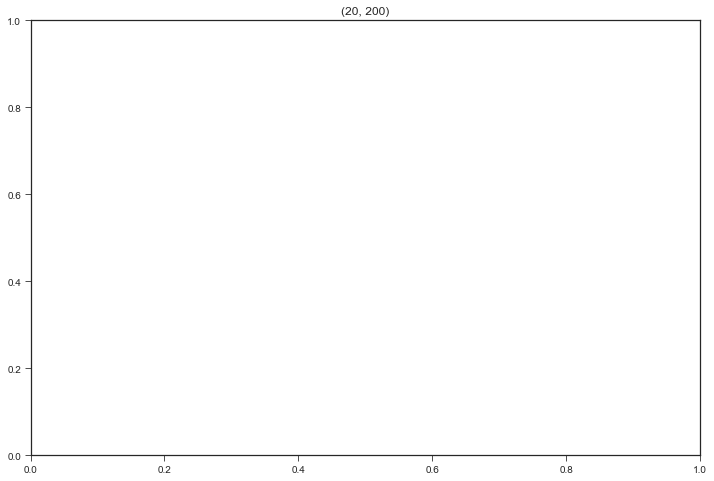

In [11]:
np.random.seed(94305) # for exact figure reproducibility and sets used in main text, use this seed



this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')

datasets = {}


gene_list = ['IRA1_nonsense','GPB2','PDE2','Diploid','ExpNeutral']

# n_trials = 10
n_trials = 5

# param_list = [(4,10),(3,10),(5,10),(4,5),(3,5),(5,5),(4,15),(3,15),(5,15)]
param_list = [(3,10),(4,10),(5,10),(10,10),(3,5),(4,5),(5,5),(10,5),(3,15),(4,15),(5,15),(10,15)]
param_list = [(4,10),(10,15),(50,100)]
param_list = [(4,10),(4,200),(50,100),(250,250)]
param_list = [(20,200)]



for m,(max_train,max_test) in enumerate(param_list):
    print(max_train,max_test,((m+1)/(len(param_list))))
    
    plt.figure(figsize=(4*np.ceil(n_trials/2),4*2))
    plt.title(f'{(max_train,max_test)}')
    
    datasets[f'{(max_train,max_test)}'] = {}
    
    for i in range(n_trials):
#         ax = plt.subplot(2,np.ceil(n_trials/2),i+1)
#         max_train = 4
#         max_test = 10

        training_bcs, testing_bcs = tools.select_train_test_mutants(this_data,max_train=max_train,max_test=max_test)

        datasets[f'{(max_train,max_test)}'][i] = tools.situate_data(this_data,list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle]),list(sorted_nonm3_cols[first_nonsubtle:]),
                      training_bcs,testing_bcs,gene_list,fixed_mutant_sets=True,n_cross_validations=100)


#         these_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])

#         this_fitness = this_data[this_data['barcode'].isin(list(training_bcs)+list(testing_bcs))][these_cols].values

#         this_error = this_data[this_data['barcode'].isin(list(training_bcs)+list(testing_bcs))][[col.replace('_fitness','_error') for col in these_cols ]].values

#         graphs.svd_noise_comparison_figure(ax,this_fitness,this_error,100,yscale='log')

#         plt.savefig(f'noise_only_manyTrainTest_{(max_train,max_test)}_{n_trials}trials.pdf',bbox_inches='tight')
    

([<matplotlib.axis.XTick at 0x17dd37358>],
 <a list of 1 Text xticklabel objects>)

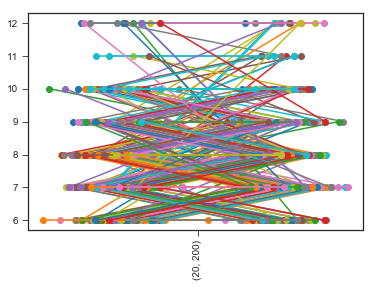

In [82]:
plt.figure()

weighted_models = []

for m,(max_train,max_test) in enumerate(param_list):
    for i in range(n_trials):
        
        dataset = datasets[f'{(max_train,max_test)}'][i]
    
        unweighted_model = dataset['CV_best_rank_index']
        weighted_model = dataset['CV_best_rank_index_weighted']
        
        weighted_models.append(weighted_model+1)
    
        x = tools.jitter_point(0,0.05)
        plt.plot([m-0.2+x,m+0.2+x],[unweighted_model+1,weighted_model+1],marker='o')
    
plt.xticks(range(len(param_list)),[str(item) for item in param_list],rotation=90)
    
    
        

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


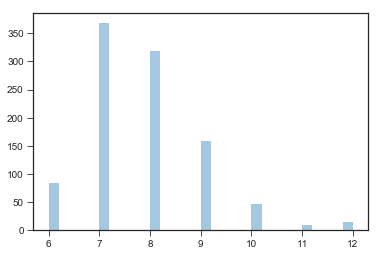

In [84]:
sns.distplot(weighted_models,kde=False)

([<matplotlib.axis.XTick at 0x127ffda58>,
 <a list of 2 Text xticklabel objects>)

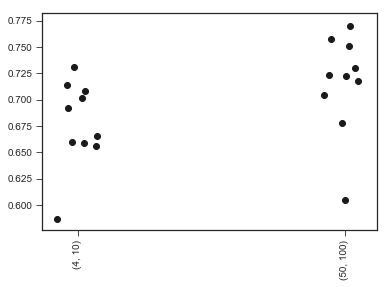

In [7]:
plt.figure()

for m,(max_train,max_test) in enumerate(param_list):
    for i in range(n_trials):
        
        dataset = datasets[f'{(max_train,max_test)}'][i]
     
        all_guesses = dataset['CV_all_guesses']
        both_old = dataset['both_old']
        dhats = dataset['dhats']
        this_fitness  = dataset['this_fitness']
        train  = dataset['train']
        test = dataset['test']
        both_new = dataset['both_new']
        guesses = dataset['guesses']
        model = dataset['CV_best_rank_index']
        test_conditions  = dataset['test_conditions']


        types = this_data[this_data['barcode'].isin(dataset['testing_bcs'])]['mutation_type'].values

        new_mut_locs = dataset['mut_locs'][model][test[1]]

        old_cond_locs = dataset['cond_locs'][model][train[0]]

        new_cond_locs = dataset['cond_locs'][model][test[0]]

        these_sigmas = dataset['dimension_weights'][model]
        these_sigmas = these_sigmas[:model+1,:model+1]

        nonsubtle_fit = tools.var_explained_weighted_by_type(this_fitness[test[1],:][:,test[0]],
                                                                      np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T)),types)[0]
#         nonsubtle_fit = tools.var_explained(this_fitness[test[1],:][:,test[0]],
#                                                                       np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T)))[0]

        plt.scatter(tools.jitter_point(m,0.05),nonsubtle_fit,color='k')
    
plt.xticks(range(len(param_list)),[str(item) for item in param_list],rotation=90)
    
    

In [12]:
all_improvements = []

for m,(max_train,max_test) in enumerate(param_list):
    for i in range(n_trials):
        dataset = datasets[f'{(max_train,max_test)}'][i]
        guesses = dataset['guesses']
        both_new = dataset['both_new']
        
        train_conditions = dataset['train_conditions']
        test_conditions = dataset['test_conditions']
        training_bcs = dataset['training_bcs']
        testing_bcs = dataset['testing_bcs']
        
        left_out_fits = tools.leave_one_out_analysis(this_data,train_conditions,test_conditions,training_bcs,testing_bcs,weighted=True)
        left_out_fits = left_out_fits[0]

        types = this_data[this_data['barcode'].isin(dataset['testing_bcs'])]['mutation_type'].values
        
        subtle5 = []
        subtle8 = []
        
        for left_out_index in range(len(train_conditions)):
            subtle5.append(left_out_fits[train_conditions[left_out_index]][4][0])
            subtle8.append(left_out_fits[train_conditions[left_out_index]][7][0])

#         types = this_data[this_data['barcode'].isin(dataset['testing_bcs'])]['mutation_type'].values
        strong5 = np.asarray([tools.var_explained_weighted_by_type(both_new[:,i],guesses[4][:,i],types)[0] for i in range(both_new.shape[1])])
        strong8 = np.asarray([tools.var_explained_weighted_by_type(both_new[:,i],guesses[7][:,i],types)[0] for i in range(both_new.shape[1])])
        
        all_improvements.append(np.asarray(list((np.asarray(subtle8)-np.asarray(subtle5))/np.asarray(subtle8))+list((np.asarray(strong8)-np.asarray(strong5))/np.asarray(strong8))))
        
        
        

[65.16 49.59] [124.68  49.59] 29.760000000000005


Text(4,-0.5,'Batches\nof the\nEvolution\nCondition')

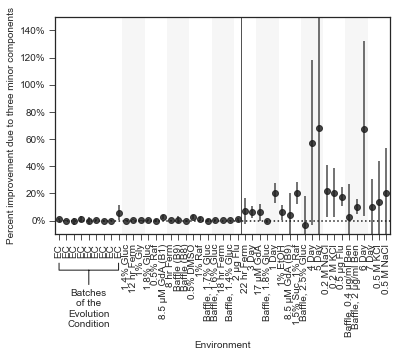

In [28]:
all_improvements = np.asarray(all_improvements)

plt.errorbar(range(len(train_conditions)+len(test_conditions)),np.mean(all_improvements,axis=0),yerr=2*np.std(all_improvements,axis=0),
marker='o',color='k',linestyle='None',alpha=0.8)

plt.axhline(0,color='k',linestyle=':')
plt.ylim(-0.1,1.5)
plt.xticks(range(len(train_conditions)+len(test_conditions)),[renamed_conditions[col.replace('_fitness','')] for col in list(train_conditions)+list(test_conditions)],rotation=90)

plt.xlim(-0.5,len(train_conditions)+len(test_conditions)-0.5)
ymin,ymax = plt.ylim()

plt.axvline(len(train_conditions)-0.5,color='k',lw=0.75)

for i in range(int(np.ceil((len(train_conditions)+len(test_conditions))/3))):
    if (i % 2) == 0:
        # print(i)
        rect = matplotlib.patches.Rectangle((8+1+3*i-0.5,ymin),3,ymax-ymin,
                                        linewidth=0,edgecolor='lightgray',facecolor='lightgray',alpha=0.2)
        plt.gca().add_patch(rect)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Environment')
plt.ylabel('Percent improvement due to three minor components')

arrow_left = plt.gca().transData.transform_point((1, 0))
arrow_right = plt.gca().transData.transform_point((9, 0))

arrow_width = (arrow_right[0]-arrow_left[0])/2
print(arrow_left,arrow_right,arrow_width)

trans_arrow = matplotlib.transforms.blended_transform_factory(plt.gca().transData, plt.gca().transData)

plt.annotate('Batches\nof the\nEvolution\nCondition', xy=(9/2-0.5, -0.35), xytext=(9/2-0.5, -0.5), 
    fontsize=10,ha='center', va='top',xycoords=trans_arrow,annotation_clip=False,
    arrowprops=dict(arrowstyle=f'-[, widthB={arrow_width}, lengthB=7.0', lw=1.0,mutation_scale=1.0))

# plt.savefig('figureS4.pdf',bbox_inches='tight')

In [71]:
np.std(all_improvements,axis=0)

array([7.22822729e-03, 2.27243389e-03, 1.33681512e-02, 1.41051017e-02,
       7.88809626e-03, 3.86896266e-03, 3.12032558e-03, 2.24432338e-03,
       2.99362476e-02, 2.39501722e-03, 2.82177654e-03, 4.35508275e-03,
       7.64021038e-03, 8.42104367e-03, 1.27014765e-02, 4.17186053e-03,
       1.48706127e-02, 3.01745913e-03, 8.54719810e-03, 1.10030893e-02,
       5.11819040e-03, 4.59479686e-03, 3.07145906e-03, 3.35938387e-03,
       8.96214195e-03, 7.00347470e-02, 2.90089067e-02, 3.24348358e-02,
       6.35433652e-03, 6.27295690e-02, 4.54320407e-02, 5.76072112e-02,
       5.16324500e-02, 5.28666825e-02, 8.57645395e+00, 4.29753348e+01,
       3.80649723e+00, 2.63639232e+00, 3.60111402e-02, 9.91937361e-02,
       5.88419756e-02, 6.72197831e-01, 2.34804018e-01, 1.33673048e-01,
       2.59337747e-01])

Text(0,0.5,'Percent improvement due to three minor components')

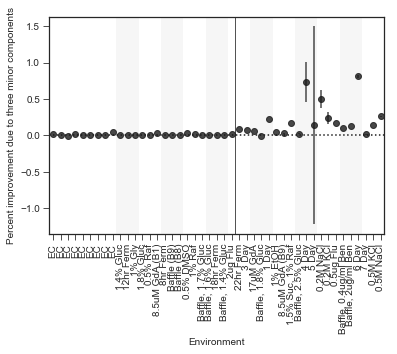

In [80]:
all_improvements = np.asarray(all_improvements)

plt.errorbar(range(len(train_conditions)+len(test_conditions)),np.mean(all_improvements,axis=0),yerr=np.std(all_improvements,axis=0)/np.sqrt(len(all_improvements[:,0])),
marker='o',color='k',linestyle='None',alpha=0.8)

plt.axhline(0,color='k',linestyle=':')

plt.xticks(range(len(train_conditions)+len(test_conditions)),[renamed_conditions[col.replace('_fitness','')] for col in list(train_conditions)+list(test_conditions)],rotation=90)

plt.xlim(-0.5,len(train_conditions)+len(test_conditions)-0.5)
# plt.yscale('log')
# plt.ylim(10**-4,1)
ymin,ymax = plt.ylim()

plt.axvline(len(train_conditions)-0.5,color='k',lw=0.75)

for i in range(int(np.ceil((len(train_conditions)+len(test_conditions))/3))):
    if (i % 2) == 0:
        # print(i)
        rect = matplotlib.patches.Rectangle((8+1+3*i-0.5,ymin),3,ymax-ymin,
                                        linewidth=0,edgecolor='lightgray',facecolor='lightgray',alpha=0.2)
        plt.gca().add_patch(rect)
plt.xlabel('Environment')
plt.ylabel('Percent improvement due to three minor components')

# plt.savefig('robustness_improvement_1000_ylim.pdf',bbox_inches='tight')

In [70]:
import scipy
scipy.stats.ttest_1samp(all_improvements[:,43],0)

Ttest_1sampResult(statistic=33.59046622148418, pvalue=3.714419269028065e-166)

[165.38181818 463.81090909] [233.01818182 463.81090909] 33.81818181818181
[165.38181818 463.81090909] [233.01818182 463.81090909] 33.81818181818181
[165.38181818 463.81090909] [233.01818182 463.81090909] 33.81818181818181
[165.38181818 463.81090909] [233.01818182 463.81090909] 33.81818181818181
[165.38181818 463.81090909] [233.01818182 463.81090909] 33.81818181818181


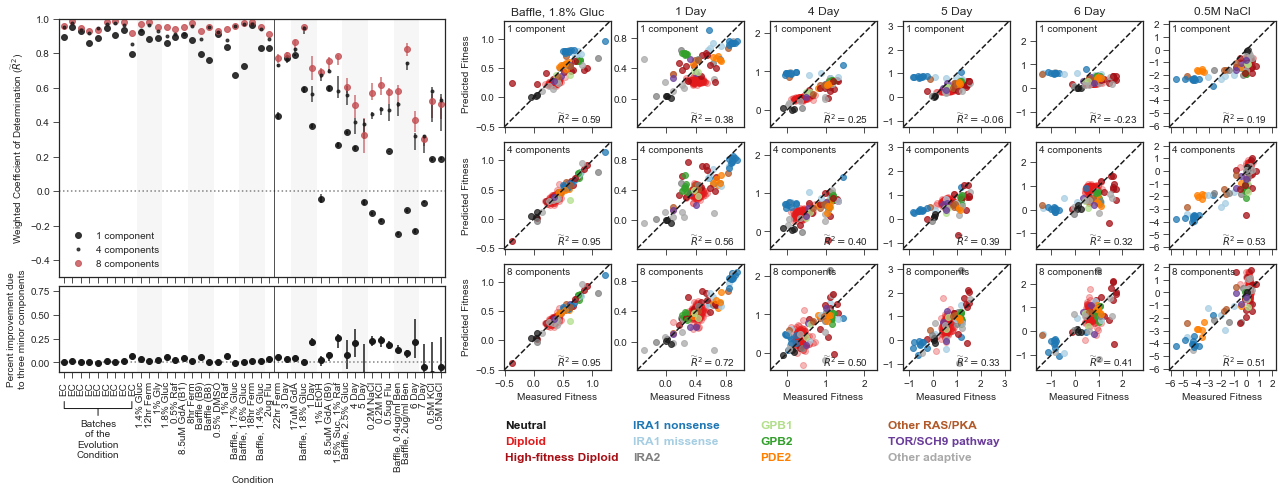

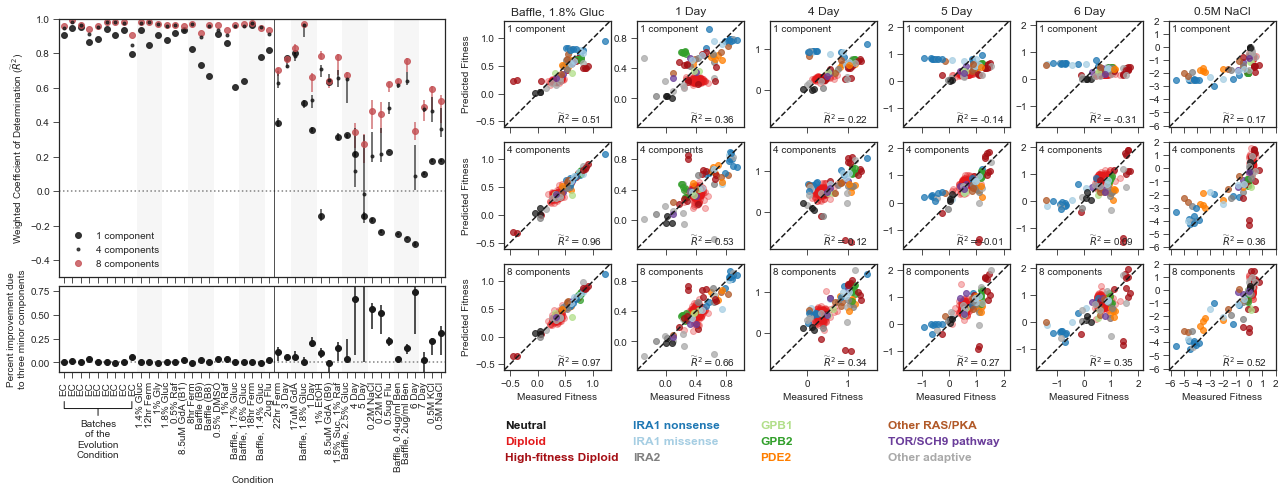

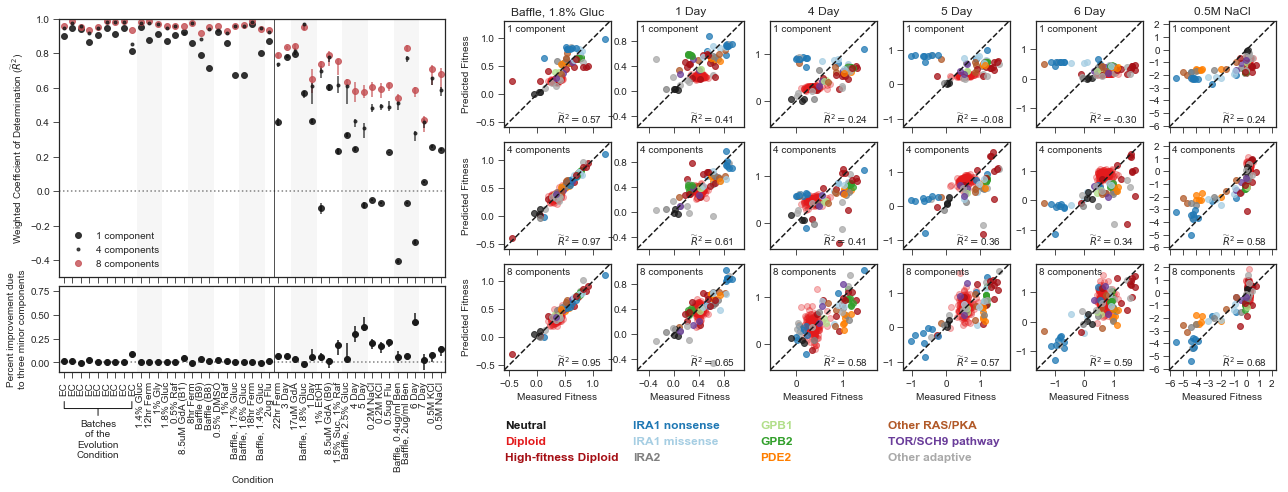

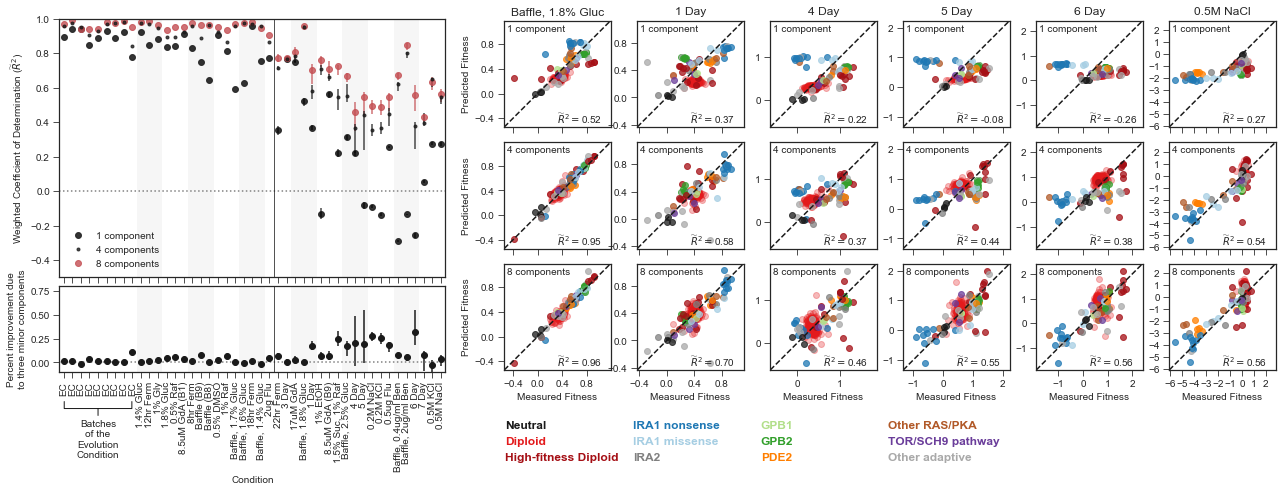

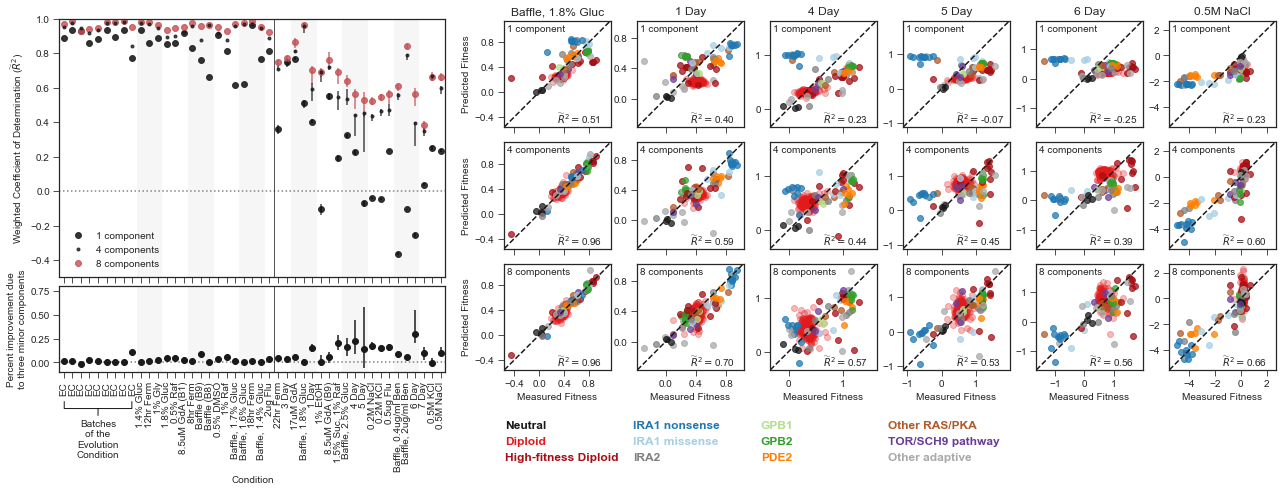

In [4]:
for m,(max_train,max_test) in enumerate(param_list):
    for i in range(n_trials):
    
#         model = datasets[f'{(max_train,max_test)}'][i]
#         example_names = ['1.8%','Resp_24hr_Transfer','1BB_SucRaf','2.5%','Resp_4Day_Transfer', '1BB_0.5ugFlu','Resp_6Day_Transfer','1BB_0.5MNaCl']
        example_names = ['1.8%','Resp_24hr_Transfer','Resp_4Day_Transfer','Resp_5Day_Transfer','Resp_6Day_Transfer','1BB_0.5MNaCl']
    
        graphs.Figure4_leaveout_w_examples(datasets[f'{(max_train,max_test)}'][i],gene_list,this_data,[col + '_fitness' for col in example_names],models=[3,7],weighted=True)
        plt.savefig(f'Figure4_LEAVEOUT_moreTrainTest_{(max_train,max_test)}_{i}.pdf',bbox_inches='tight')

1 0.09188305419840748
2 0.7104632186065986
3 0.7339643066154657
4 0.7325376571149111
5 0.7148320868234674
6 0.7263285935723175
7 0.7518920523634703
8 0.7557135726505504
1 0.09188305419840748
2 0.7104632186065986
3 0.7339643066154657
4 0.7325376571149111
5 0.7148320868234674
6 0.7263285935723175
7 0.7518920523634703
8 0.7557135726505504
1 0.09188305419840748
2 0.7104632186065986
3 0.7339643066154657
4 0.7325376571149111
5 0.7148320868234674
6 0.7263285935723175
7 0.7518920523634703
8 0.7557135726505504
1 0.09188305419840748
2 0.7104632186065986
3 0.7339643066154657
4 0.7325376571149111
5 0.7148320868234674
6 0.7263285935723175
7 0.7518920523634703
8 0.7557135726505504
1 0.09188305419840748
2 0.7104632186065986
3 0.7339643066154657
4 0.7325376571149111
5 0.7148320868234674
6 0.7263285935723175
7 0.7518920523634703
8 0.7557135726505504
1 0.09188305419840748
2 0.7104632186065986
3 0.7339643066154657
4 0.7325376571149111
5 0.7148320868234674
6 0.7263285935723175
7 0.7518920523634703
8 0.755

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


5 0.7148320868234674
6 0.7263285935723175
5 0.7148320868234674
6 0.7263285935723175
6 0.7263285935723175
7 0.7518920523634703
6 0.7263285935723175
7 0.7518920523634703
6 0.7263285935723175
7 0.7518920523634703
6 0.7263285935723175
7 0.7518920523634703
7 0.7518920523634703
8 0.7557135726505504
7 0.7518920523634703
8 0.7557135726505504
1 0.14251706290126165
2 0.7063728832174483
3 0.7267038356048955
4 0.6925300722933728
5 0.6518413298066119
6 0.6685066728596933
7 0.6857053271465493
8 0.6845772611225941
1 0.14251706290126165
2 0.7063728832174483
3 0.7267038356048955
4 0.6925300722933728
5 0.6518413298066119
6 0.6685066728596933
7 0.6857053271465493
8 0.6845772611225941
1 0.14251706290126165
2 0.7063728832174483
3 0.7267038356048955
4 0.6925300722933728
5 0.6518413298066119
6 0.6685066728596933
7 0.6857053271465493
8 0.6845772611225941
1 0.14251706290126165
2 0.7063728832174483
3 0.7267038356048955
4 0.6925300722933728
5 0.6518413298066119
6 0.6685066728596933
7 0.6857053271465493
8 0.68457

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


5 0.6518413298066119
6 0.6685066728596933
5 0.6518413298066119
6 0.6685066728596933
6 0.6685066728596933
7 0.6857053271465493
6 0.6685066728596933
7 0.6857053271465493
6 0.6685066728596933
7 0.6857053271465493
6 0.6685066728596933
7 0.6857053271465493
7 0.6857053271465493
8 0.6845772611225941
7 0.6857053271465493
8 0.6845772611225941
1 -0.016139461932088928
2 0.6968805769072763
3 0.7036428713366409
4 0.706904561832773
5 0.6926367747060758
6 0.6784117385121535
7 0.715415616859113
8 0.7165061327223263
1 -0.016139461932088928
2 0.6968805769072763
3 0.7036428713366409
4 0.706904561832773
5 0.6926367747060758
6 0.6784117385121535
7 0.715415616859113
8 0.7165061327223263
1 -0.016139461932088928
2 0.6968805769072763
3 0.7036428713366409
4 0.706904561832773
5 0.6926367747060758
6 0.6784117385121535
7 0.715415616859113
8 0.7165061327223263
1 -0.016139461932088928
2 0.6968805769072763
3 0.7036428713366409
4 0.706904561832773
5 0.6926367747060758
6 0.6784117385121535
7 0.715415616859113
8 0.71650

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


5 0.6926367747060758
6 0.6784117385121535
5 0.6926367747060758
6 0.6784117385121535
6 0.6784117385121535
7 0.715415616859113
6 0.6784117385121535
7 0.715415616859113
6 0.6784117385121535
7 0.715415616859113
6 0.6784117385121535
7 0.715415616859113
7 0.715415616859113
8 0.7165061327223263
7 0.715415616859113
8 0.7165061327223263
1 0.03702222993508475
2 0.7004698807555705
3 0.7045218889627725
4 0.7119656552102334
5 0.7126952746759867
6 0.7189403390132232
7 0.7269494383616257
8 0.7432014282584285
1 0.03702222993508475
2 0.7004698807555705
3 0.7045218889627725
4 0.7119656552102334
5 0.7126952746759867
6 0.7189403390132232
7 0.7269494383616257
8 0.7432014282584285
1 0.03702222993508475
2 0.7004698807555705
3 0.7045218889627725
4 0.7119656552102334
5 0.7126952746759867
6 0.7189403390132232
7 0.7269494383616257
8 0.7432014282584285
1 0.03702222993508475
2 0.7004698807555705
3 0.7045218889627725
4 0.7119656552102334
5 0.7126952746759867
6 0.7189403390132232
7 0.7269494383616257
8 0.74320142825

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


5 0.7126952746759867
6 0.7189403390132232
5 0.7126952746759867
6 0.7189403390132232
6 0.7189403390132232
7 0.7269494383616257
6 0.7189403390132232
7 0.7269494383616257
6 0.7189403390132232
7 0.7269494383616257
6 0.7189403390132232
7 0.7269494383616257
7 0.7269494383616257
8 0.7432014282584285
7 0.7269494383616257
8 0.7432014282584285
1 0.10158393235747043
2 0.6837707473511077
3 0.7033513415921739
4 0.7099312080092557
5 0.7106565631189573
6 0.709098344315449
7 0.7038057215944291
8 0.7428306561597884
1 0.10158393235747043
2 0.6837707473511077
3 0.7033513415921739
4 0.7099312080092557
5 0.7106565631189573
6 0.709098344315449
7 0.7038057215944291
8 0.7428306561597884
1 0.10158393235747043
2 0.6837707473511077
3 0.7033513415921739
4 0.7099312080092557
5 0.7106565631189573
6 0.709098344315449
7 0.7038057215944291
8 0.7428306561597884
1 0.10158393235747043
2 0.6837707473511077
3 0.7033513415921739
4 0.7099312080092557
5 0.7106565631189573
6 0.709098344315449
7 0.7038057215944291
8 0.742830656

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


5 0.7106565631189573
6 0.709098344315449
5 0.7106565631189573
6 0.709098344315449
6 0.709098344315449
7 0.7038057215944291
6 0.709098344315449
7 0.7038057215944291
6 0.709098344315449
7 0.7038057215944291
6 0.709098344315449
7 0.7038057215944291
7 0.7038057215944291
8 0.7428306561597884
7 0.7038057215944291
8 0.7428306561597884


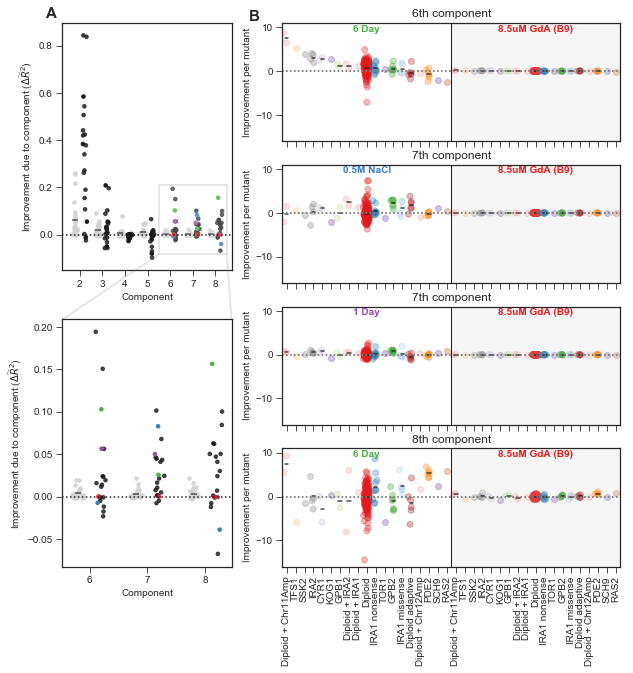

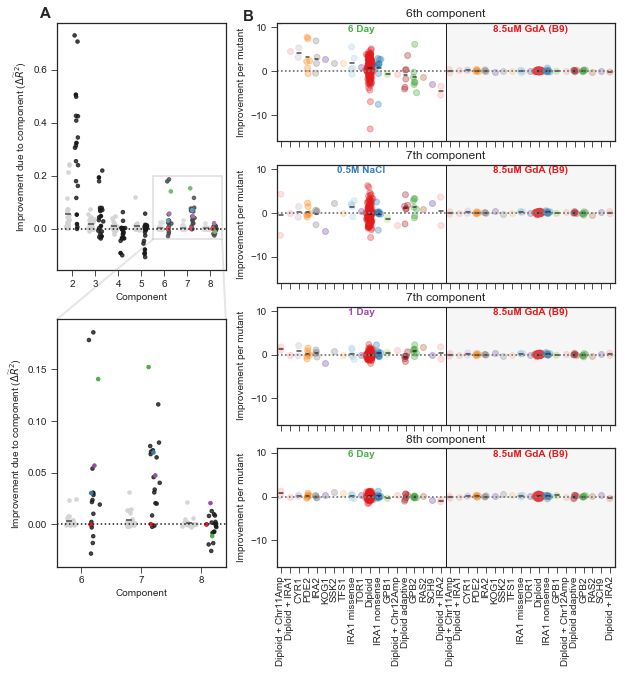

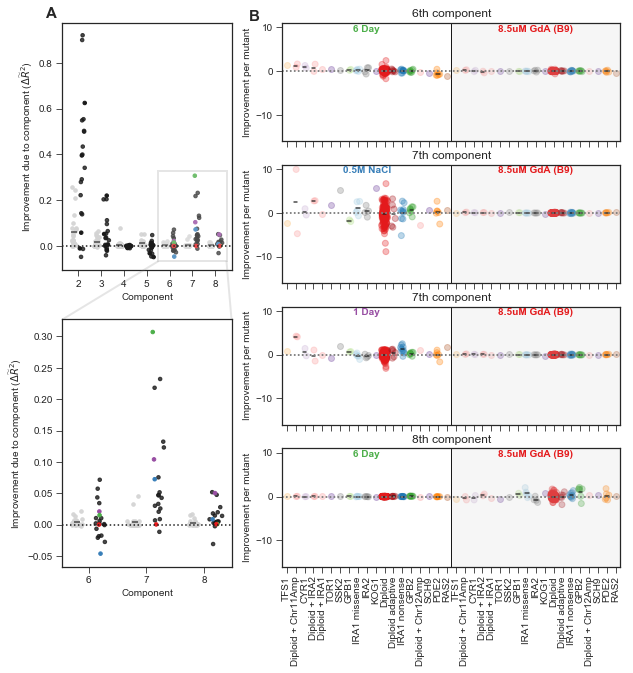

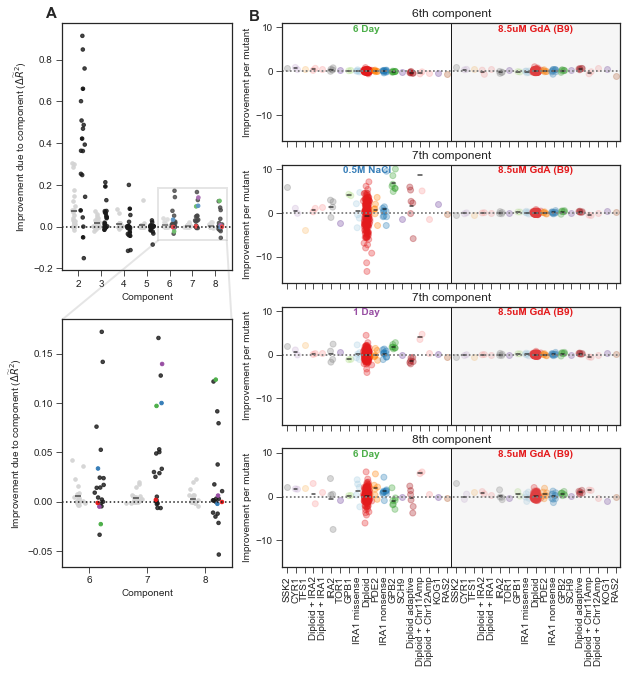

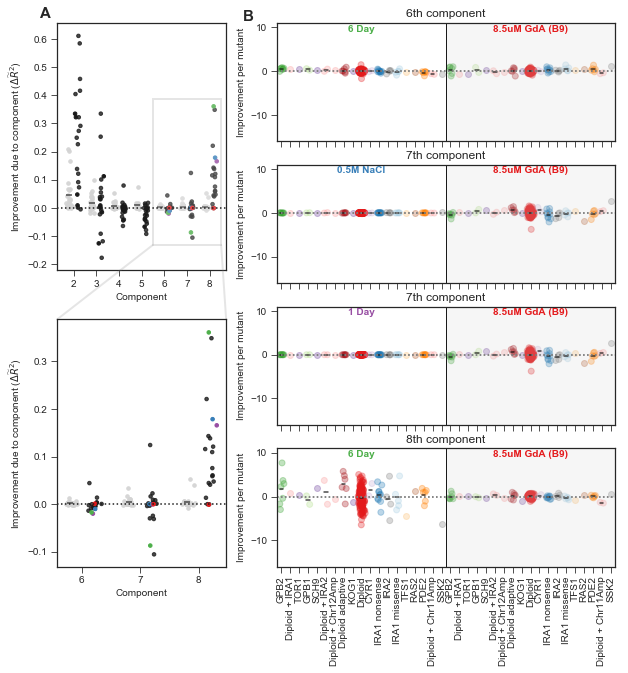

In [10]:
trying_colors= ["#e41a1c","#377eb8","#4daf4a","#984ea3"]
models = [
    (6,[list(range(5)),list(range(6))],['Resp_6Day_Transfer_fitness','1BB_8.5uMGdA_fitness']),
    (7,[list(range(6)),list(range(7))],['1BB_0.5MNaCl_fitness','1BB_8.5uMGdA_fitness']),
    (7,[list(range(6)),list(range(7))],['Resp_24hr_Transfer_fitness','1BB_8.5uMGdA_fitness']),
    (8,[list(range(7)),list(range(8))],['Resp_6Day_Transfer_fitness','1BB_8.5uMGdA_fitness'])
#     (7,[list(range(6)),list(range(7))],['Resp_24hr_Transfer_fitness','1.8%_fitness']),
#     (8,[list(range(7)),list(range(8))],['1BB_SucRaf_fitness','1.8%_fitness']),
#     (9,[list(range(8)),list(range(9))],['Resp_5Day_Transfer_fitness','1.8%_fitness'])
]
# all_jitters = [tools.jitter_point(0) for i in range(1000)]

focal_conditions = {
#                     'Resp_24hr_Transfer_fitness':(7,"#f0027f"),
#                     'Resp_24hr_Transfer_fitness':(7,"#ffff99"),
#                     '1BB_SucRaf_fitness':(8,"#7fc97f"),
#                     'Resp_5Day_Transfer_fitness':(9,"#fdc086")
#                     'Resp_24hr_Transfer_fitness':([6,7,8],trying_colors[3]),
#                     '1BB_SucRaf_fitness':([6,7,8],trying_colors[1]),
#                     'Resp_5Day_Transfer_fitness':([6,7,8],trying_colors[2])
                    'Resp_24hr_Transfer_fitness':([6,7,8],trying_colors[3]),
                    '1BB_0.5MNaCl_fitness':([6,7,8],trying_colors[1]),
                    'Resp_6Day_Transfer_fitness':([6,7,8],trying_colors[2])
                   }

# contrast_condition = {'1.8%_fitness':[7,8,9]}
contrast_condition = {'1BB_8.5uMGdA_fitness':[6,7,8]}
# contrast_color = "#beaed4"
contrast_color = trying_colors[0]



for m,(max_train,max_test) in enumerate(param_list):
    for i in range(n_trials):

        fig,return_diffs = graphs.Figure5(datasets[f'{(max_train,max_test)}'][i],datasets[f'{(max_train,max_test)}'][i],this_data,
                       models,focal_conditions,contrast_condition,contrast_color=contrast_color,full_model=range(8))
# plt.savefig('figure5_gda_all_entries_ylimadjust.pdf',bbox_inches='tight')

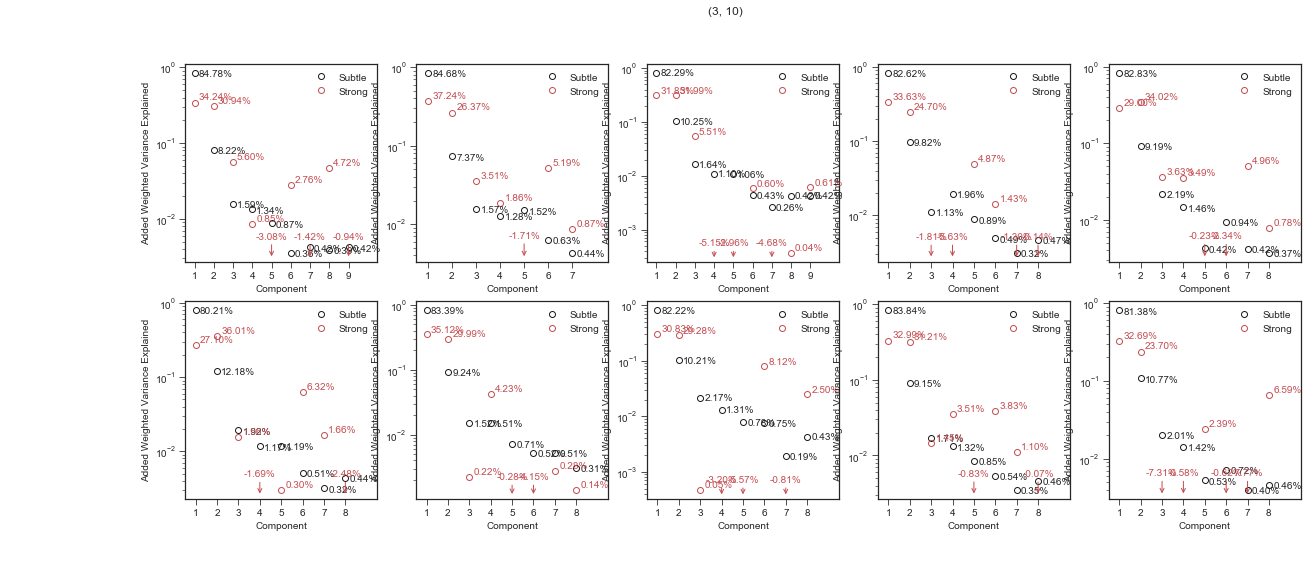

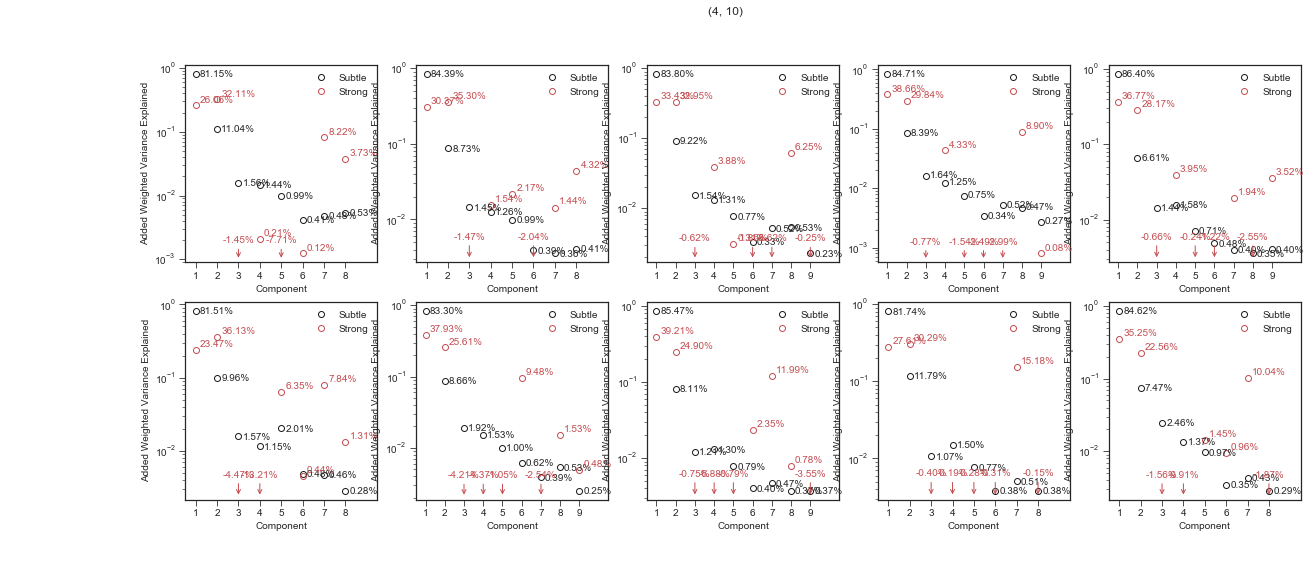

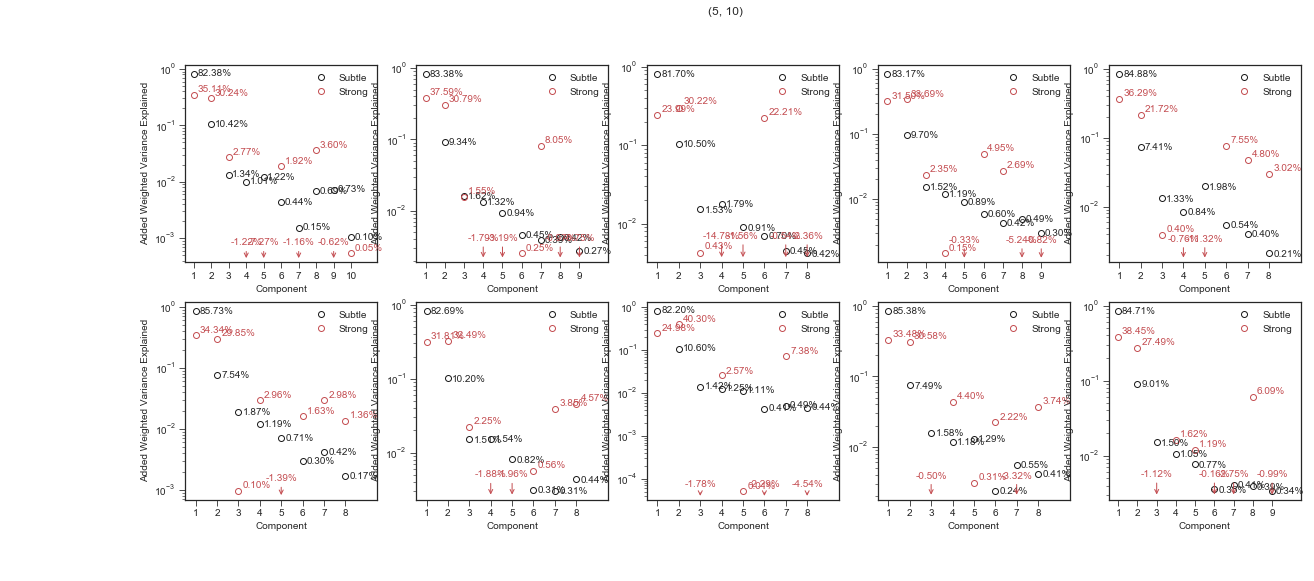

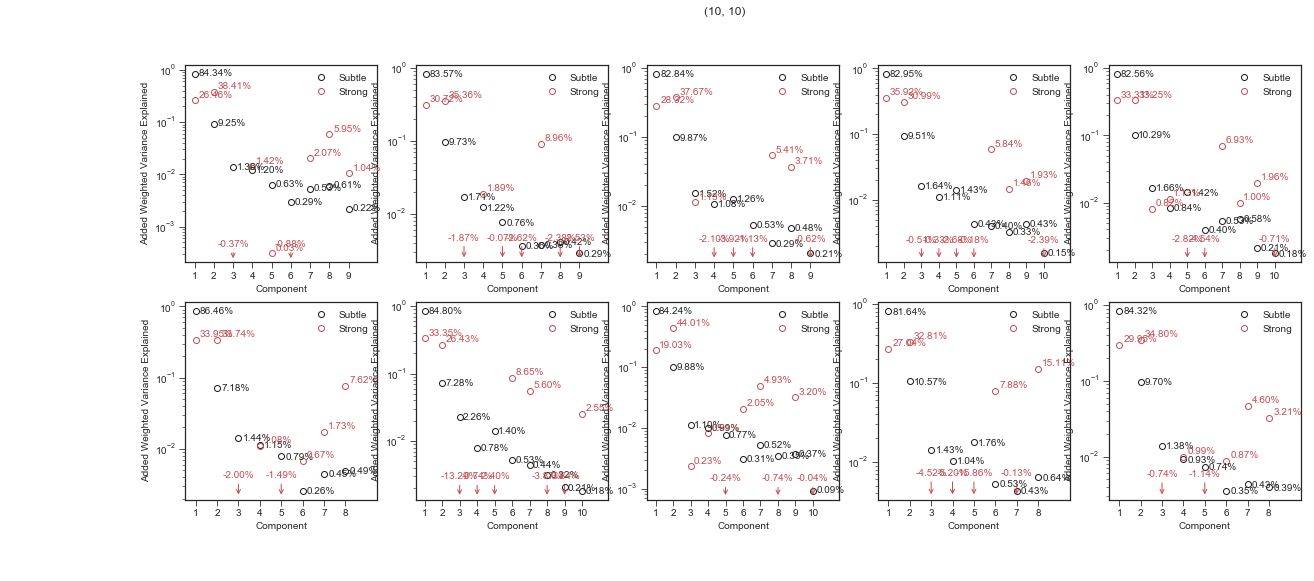

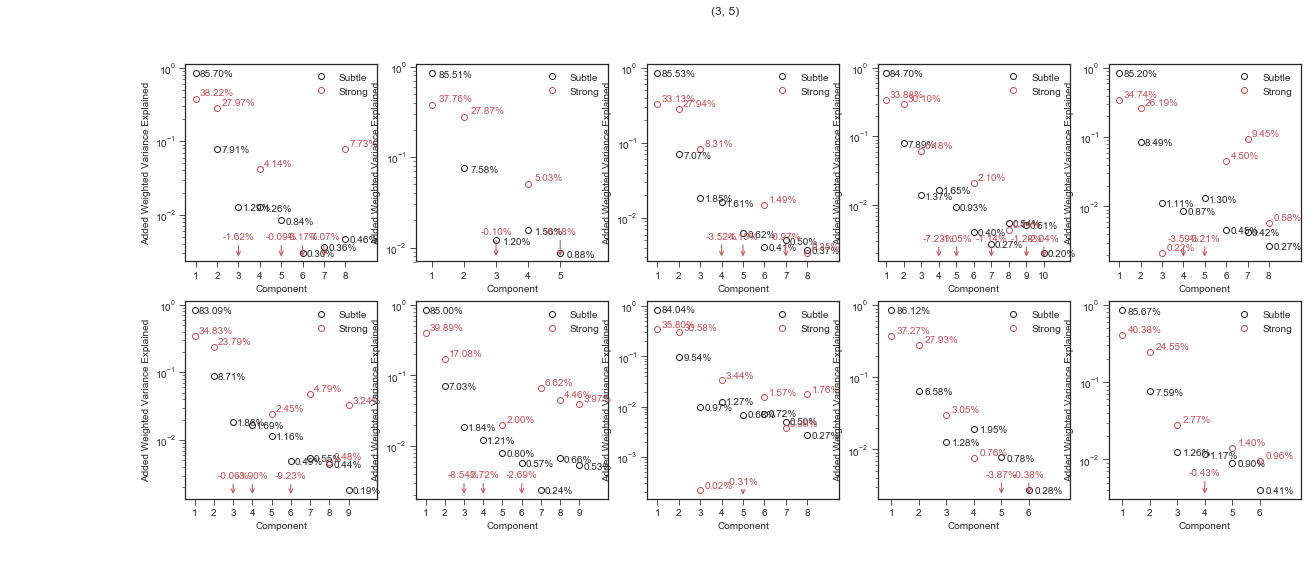

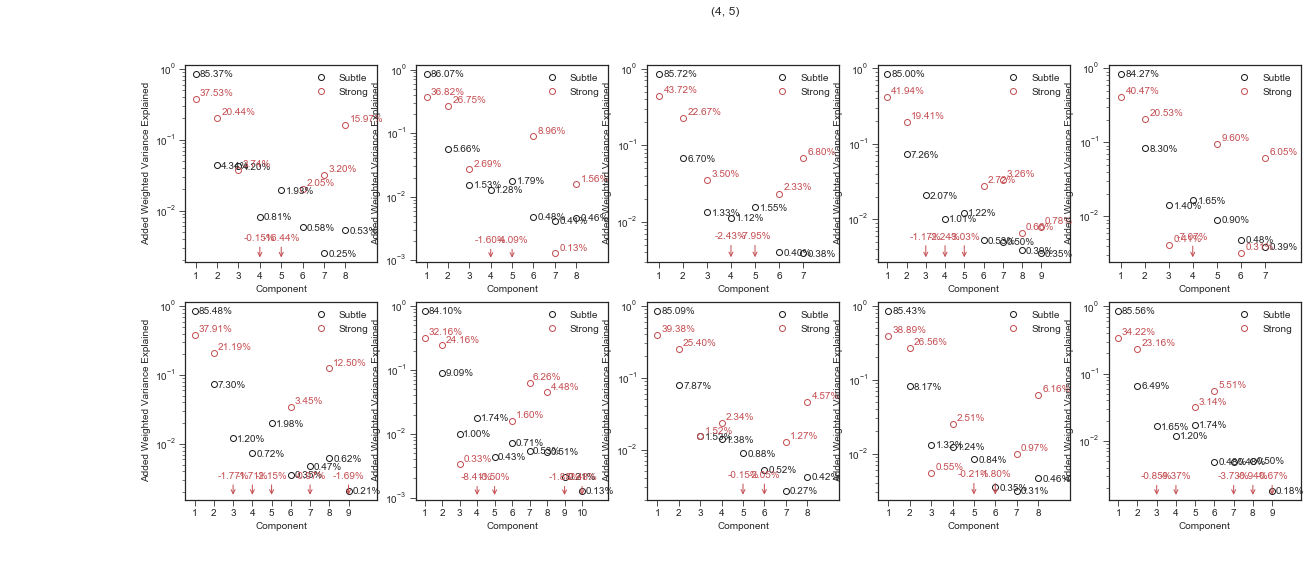

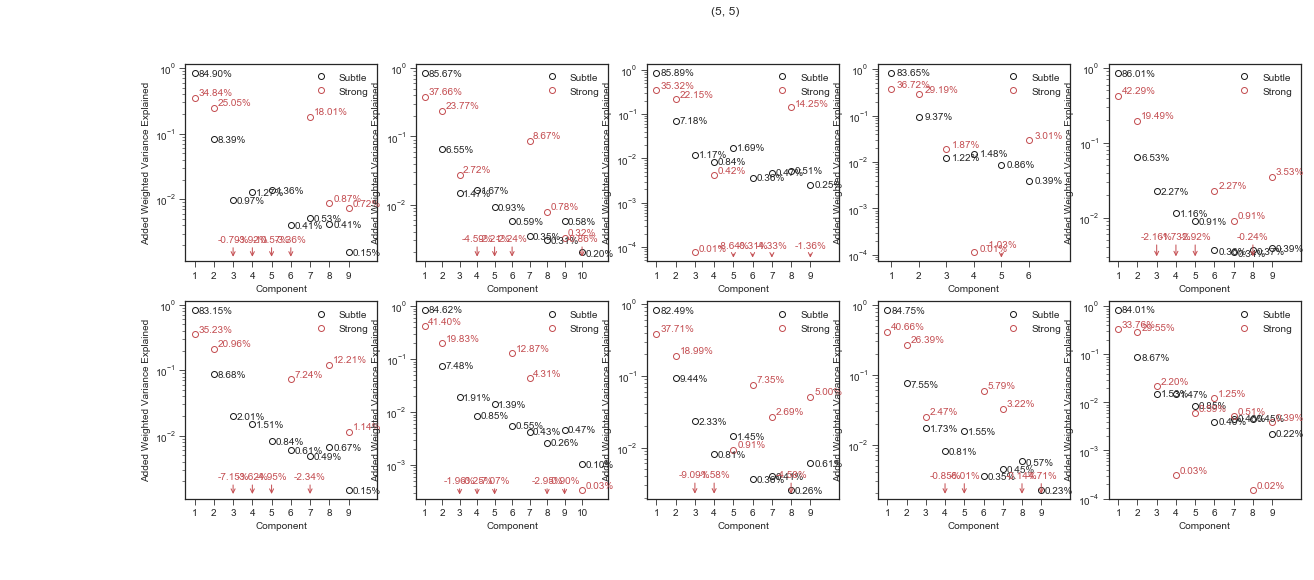

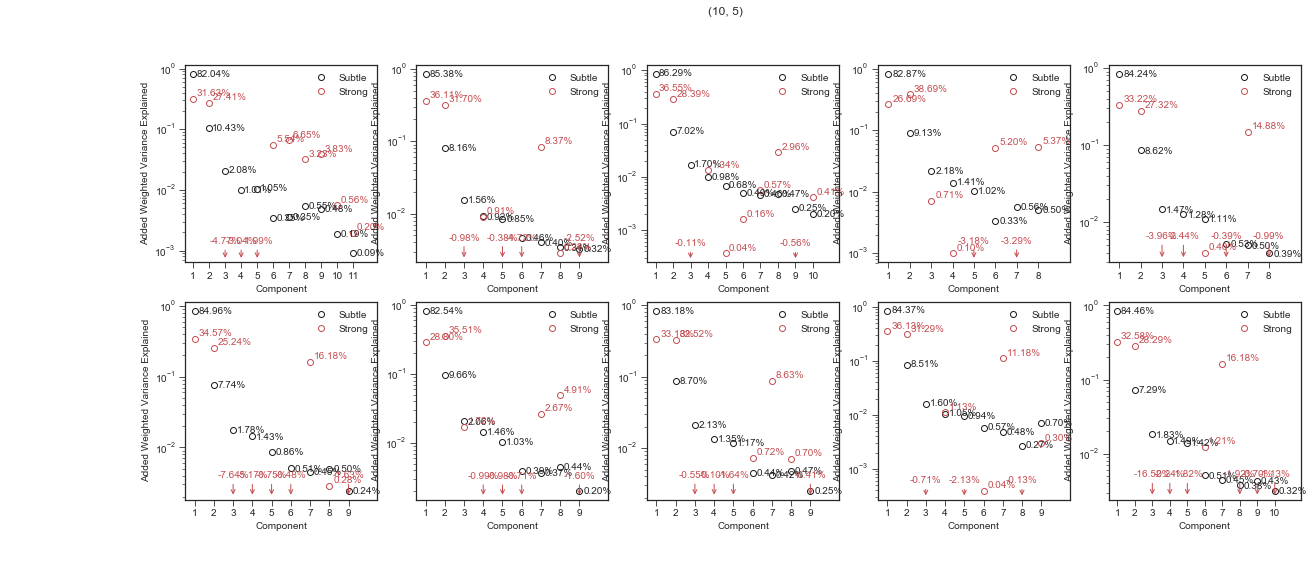

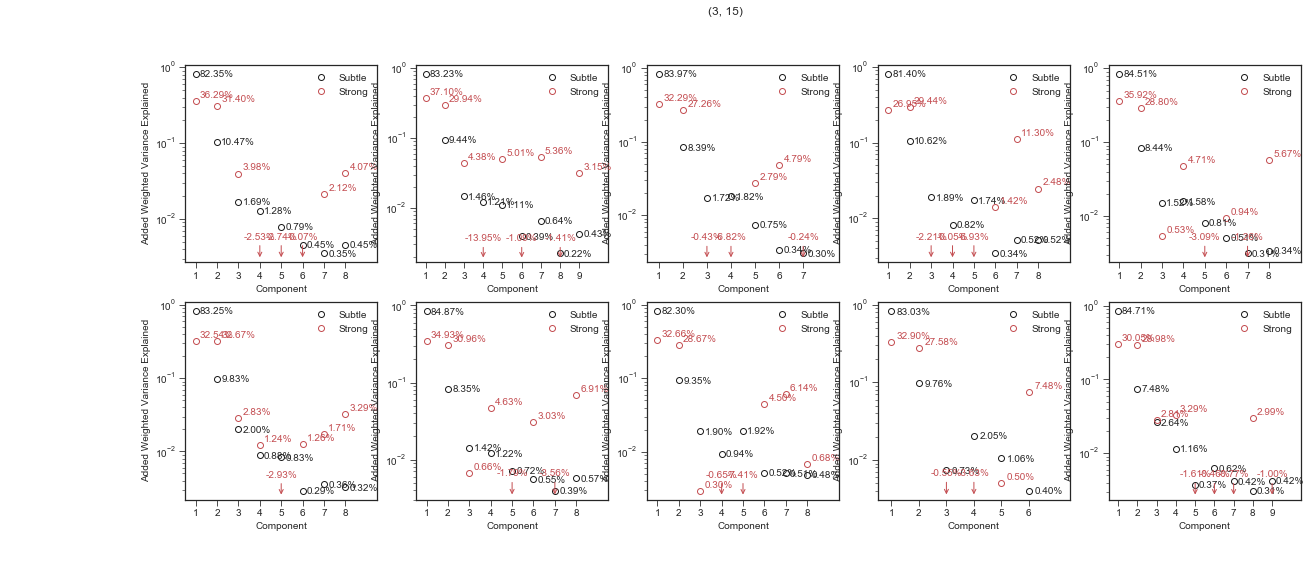

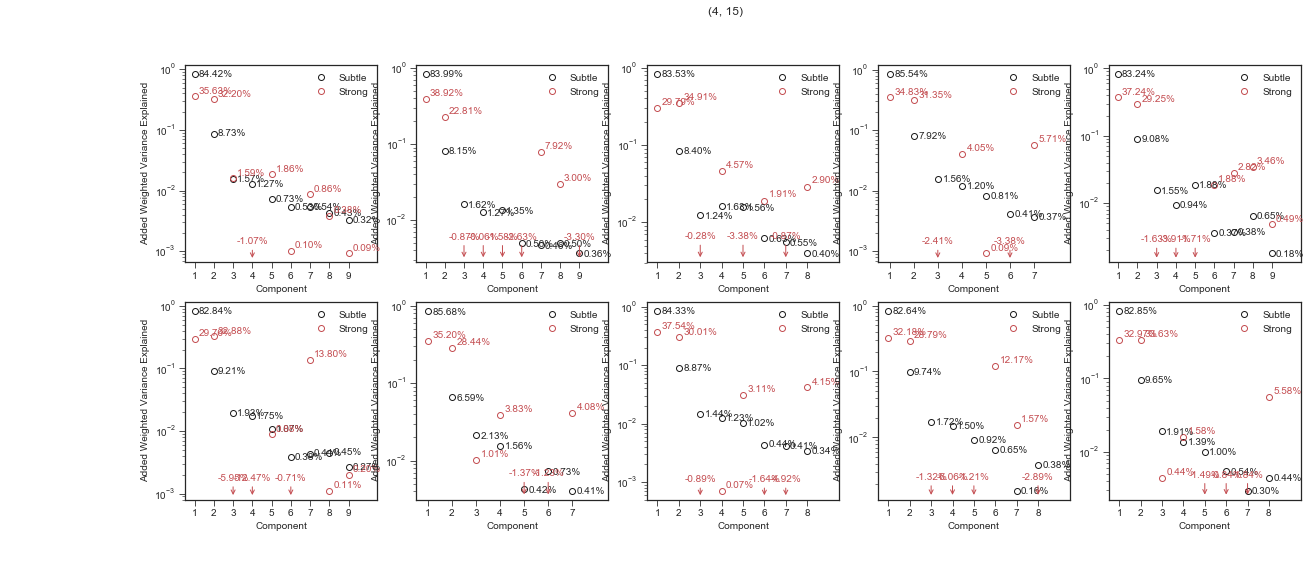

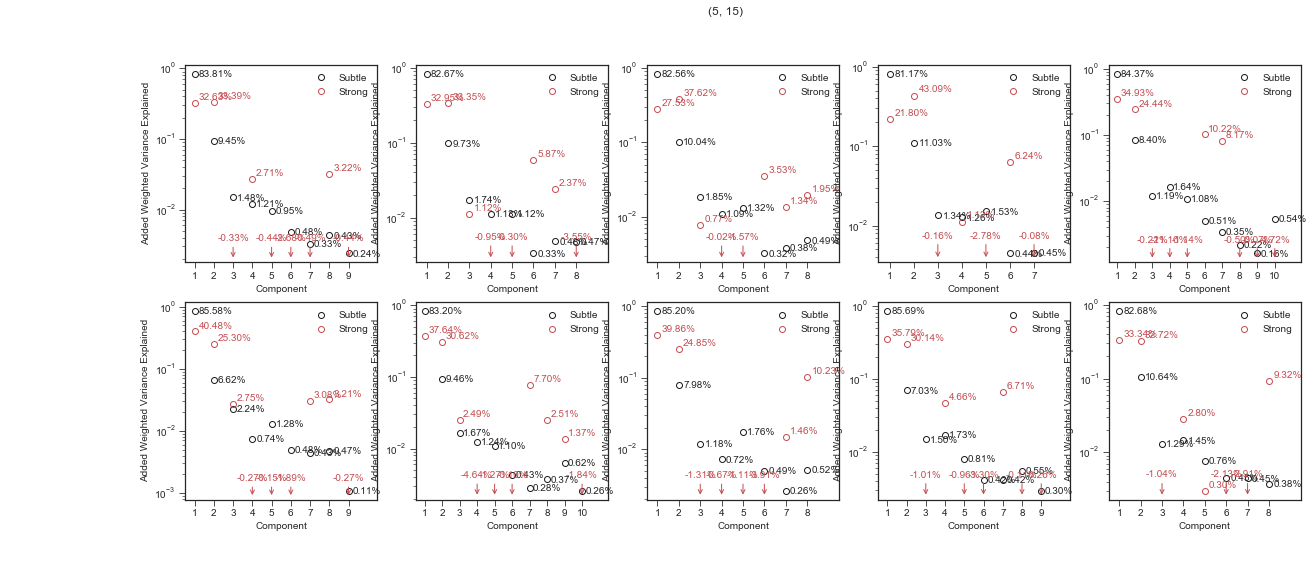

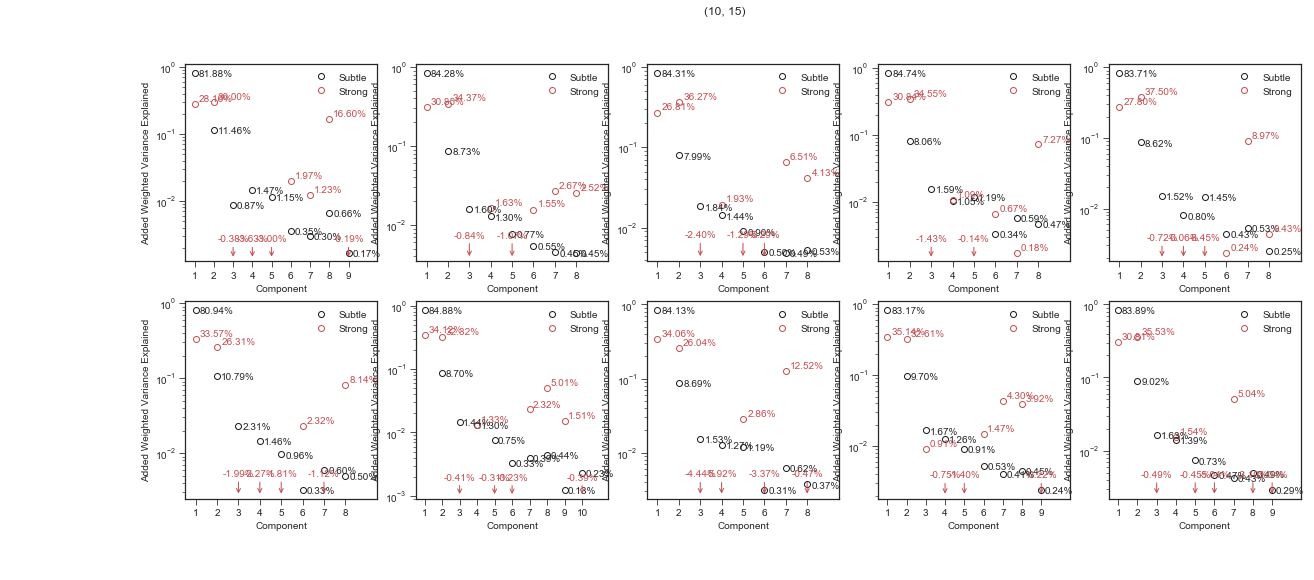

In [55]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')

weighted = False

ns_fits = {}
s_fits = {}

for m,(max_train,max_test) in enumerate(param_list):
    plt.figure(figsize=(4*np.ceil(n_trials/2),4*2))
    plt.suptitle(f'{(max_train,max_test)}')
    
    ns_fits[f'{(max_train,max_test)}'] = {}
    s_fits[f'{(max_train,max_test)}'] = {}
    for i in range(n_trials):
        ax = plt.subplot(2,np.ceil(n_trials/2),i+1)
        
        dataset = datasets[f'{(max_train,max_test)}'][i]
        n_perms = 100
        weighted= True
        ymax = 1.0
        ymin = -1.0

        all_guesses = dataset['CV_all_guesses']
        both_old = dataset['both_old']
        dhats = dataset['dhats']
        this_fitness  = dataset['this_fitness']
        train  = dataset['train']
        test = dataset['test']
        both_new = dataset['both_new']
        guesses = dataset['guesses']
        model = dataset['CV_best_rank_index']
        test_conditions  = dataset['test_conditions']
        
        end = model
        nonsubtle_fits = []
        subtle_fits = []
        overall_subtle = []
        overall_nonsubtle = []
        for model in range(20):
            # this_gene_data = this_data[this_data['barcode'].isin(test_mutant_data)]
            types = this_data[this_data['barcode'].isin(dataset['testing_bcs'])]['mutation_type'].values

            new_mut_locs = dataset['mut_locs'][model][test[1]]

            old_cond_locs = dataset['cond_locs'][model][train[0]]

            new_cond_locs = dataset['cond_locs'][model][test[0]]

            these_sigmas = dataset['dimension_weights'][model]
            these_sigmas = these_sigmas[:model+1,:model+1]

            overall_nonsubtle.append(tools.var_explained_weighted_by_type(this_fitness[test[1],:][:,test[0]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T)),types,weighted=weighted)[0])

            this_sse = np.asarray([tools.var_explained_weighted_by_type(this_fitness[test[1],test[0][i]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T))[:,i],types,weighted=weighted)[0] for i in range(new_cond_locs.shape[0])])
            nonsubtle_fits.append(this_sse)
            

            overall_subtle.append(tools.var_explained_weighted_by_type(this_fitness[test[1],:][:,train[0]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,old_cond_locs.T)),types,weighted=weighted)[0])


            subtle_sse = np.asarray([tools.var_explained_weighted_by_type(this_fitness[test[1],train[0][i]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,old_cond_locs.T))[:,i],types,weighted=weighted)[0] for i in range(old_cond_locs.shape[0])])


            subtle_fits.append(subtle_sse)
        
        ns_fits[f'{(max_train,max_test)}'][i] = nonsubtle_fits
        s_fits[f'{(max_train,max_test)}'][i] = subtle_fits
#         end = model

        plt.plot([overall_subtle[0]]+list(np.diff(overall_subtle))[:end],'o',markeredgecolor='k',markerfacecolor='None',label='Subtle')
        plt.ylabel('Added Weighted Variance Explained')
        # plt.yscale('log',basey=10)

        for i,item in enumerate([overall_subtle[0]]+list(np.diff(overall_subtle))[:end]):
        #     plt.annotate(xy=(i+0.2,item+0.0*item),s=f'{item*100:.2f}% ({overall_subtle[i]*100:.2f}%)',transform=plt.gca().transAxes)
            plt.annotate(xy=(i+0.2,item-0.1*item),s=f'{item*100:.2f}%',transform=plt.gca().transAxes)

        plt.plot([overall_nonsubtle[0]]+list(np.diff(overall_nonsubtle))[:end],'o',markeredgecolor='r',markerfacecolor='None',label='Strong')
        plt.ylabel('Added Weighted Variance Explained')
        plt.yscale('log',basey=10)
        plt.xticks(range(len(overall_subtle[:end+1])),range(1,len(overall_subtle[:end+1])+1))
        plt.xlabel('Component')

        for i,item in enumerate([overall_nonsubtle[0]]+list(np.diff(overall_nonsubtle))[:end]):
            plt.annotate(xy=(i+0.2,item+0.1*item),s=f'{item*100:.2f}%',transform=plt.gca().transAxes,color='r')


        ymin,ymax = plt.ylim()
        for i,item in enumerate([overall_nonsubtle[0]]+list(np.diff(overall_nonsubtle))[:end]):
            if item < 0:
                plt.annotate(xytext=(i,2*ymin),xy=(i,ymin+0.1*ymin),s=f'{item*100:.2f}%',transform=plt.gca().transAxes,color='r',
                             ha='center',arrowprops=dict(arrowstyle='->',color='r'))
    #             plt.annotate(xytext=(i,2*ymin),xy=(i,ymin+0.1*ymin),s="",transform=plt.gca().transAxes,color='r',
    #                  ha='center',arrowprops=dict(arrowstyle='->',color='r'))

        #     plt.annotate(xy=(i+0.2,item+0.0*item),s=f'{item*100:.2f}% ({overall_subtle[i]*100:.2f}%)',transform=plt.gca().transAxes)

        plt.xlim(-0.5,end+1.5)
#         plt.title('Contribution of components')
        plt.legend()
    

In [13]:
datasets[f'{(max_train,max_test)}'][i]['training_bcs']

[151,
 2768,
 2808,
 3675,
 5564,
 5804,
 6271,
 6582,
 7953,
 7961,
 7994,
 9864,
 10851,
 11933,
 13852,
 18200,
 18420,
 19296,
 19297,
 22011,
 25531,
 32262,
 32685,
 37241,
 39674,
 40865,
 43361,
 43692,
 45031,
 60700,
 63215,
 65196,
 70433,
 71751,
 75669,
 304483,
 379777]

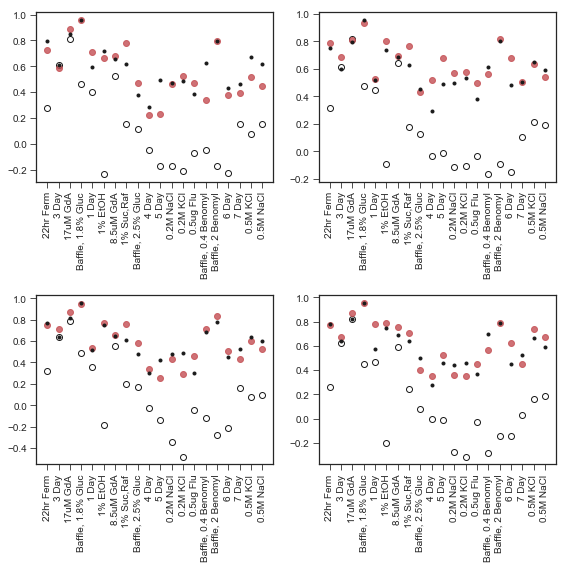

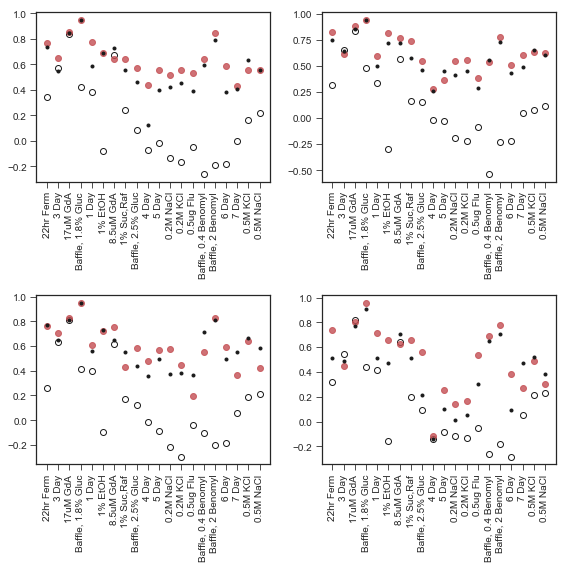

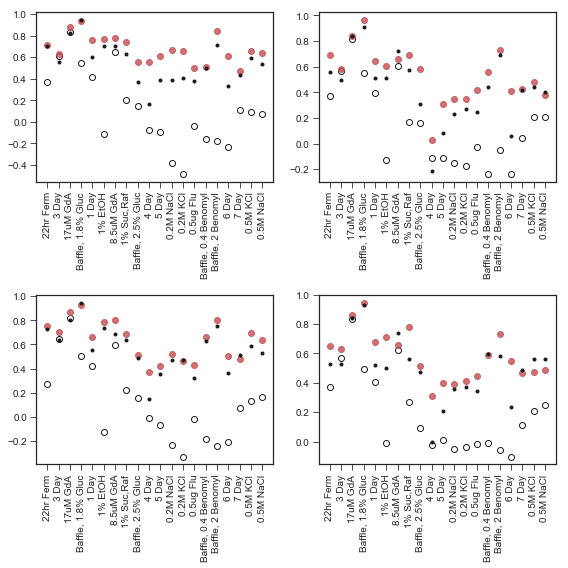

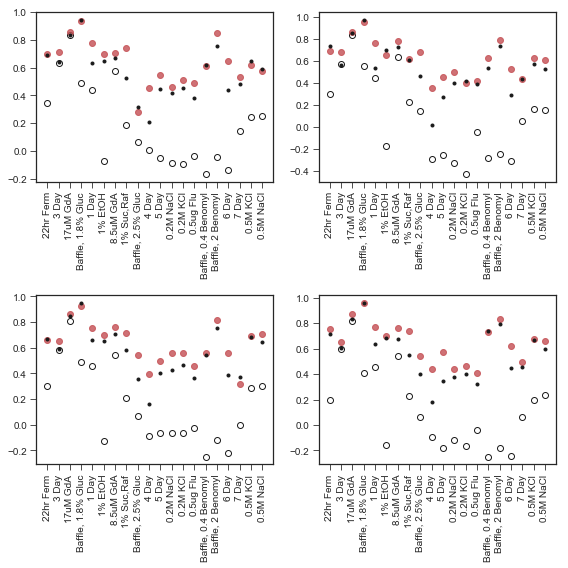

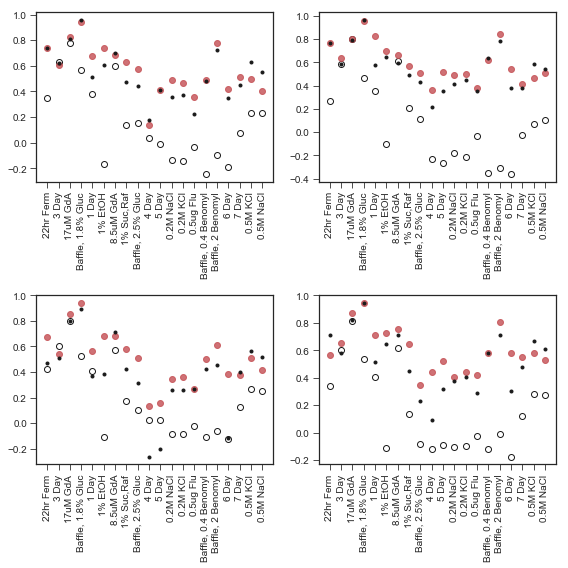

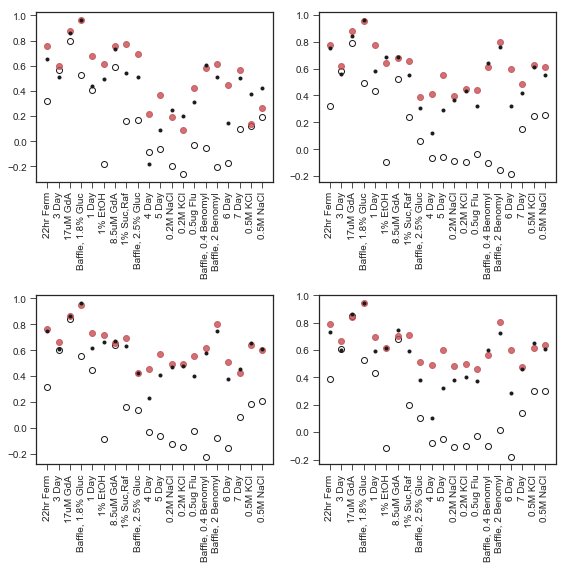

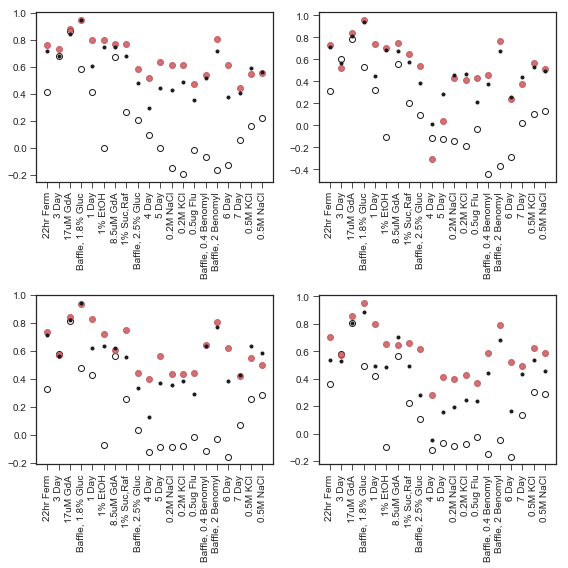

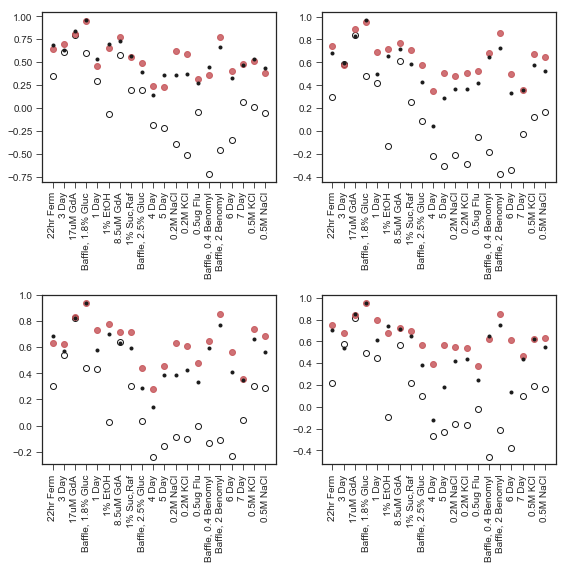

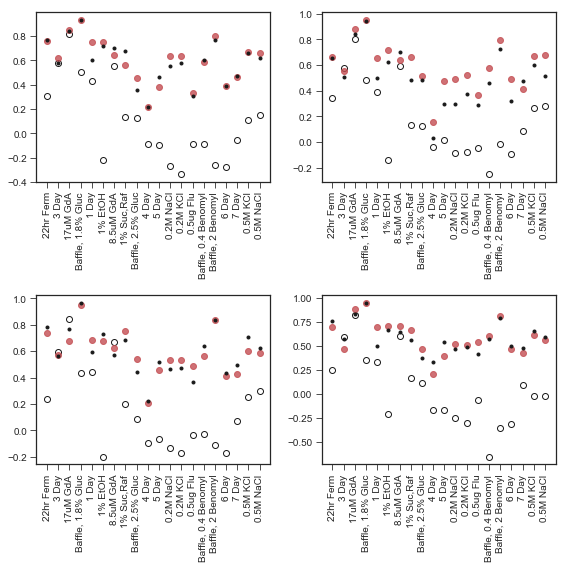

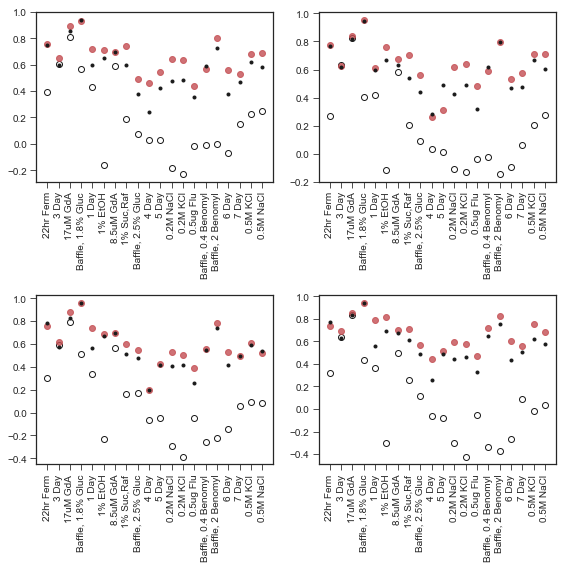

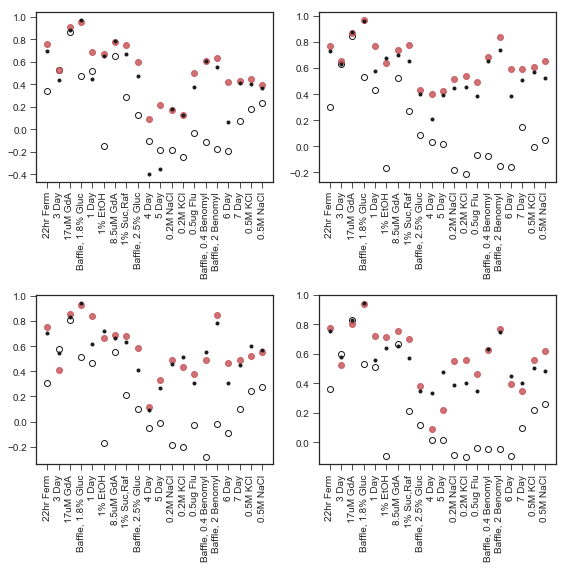

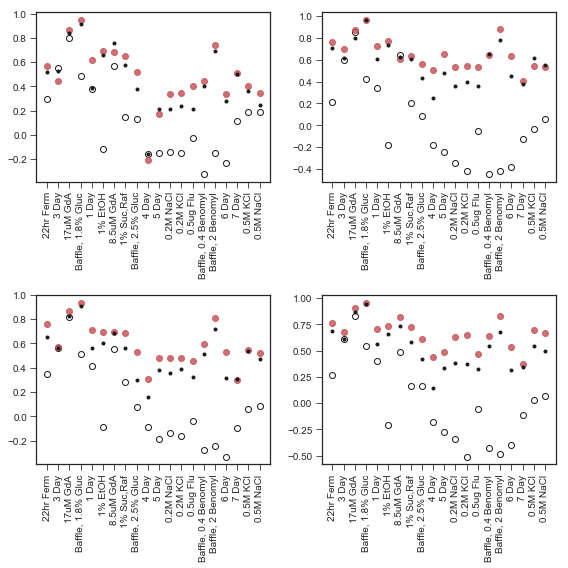

In [8]:
for m,(max_train,max_test) in enumerate(param_list):
    plt.figure(figsize=(4*np.ceil(n_trials/2),4*2))
    
#     ns_fits[f'{(max_train,max_test)}'] = {}
#     s_fits[f'{(max_train,max_test)}'] = {}
    for i in range(n_trials):
        ax = plt.subplot(2,np.ceil(n_trials/2),i+1)
        model = datasets[f'{(max_train,max_test)}'][i]['CV_best_rank_index']
        
        plt.plot(ns_fits[f'{(max_train,max_test)}'][i][0],'ko',markeredgecolor='k',markerfacecolor='None')
        
        plt.plot(ns_fits[f'{(max_train,max_test)}'][i][model],'ro',alpha=0.8)
        
        plt.plot(ns_fits[f'{(max_train,max_test)}'][i][3],'k.')
        
        plt.xticks(range(len(ns_fits[f'{(max_train,max_test)}'][i][3])),[renamed_conditions[col.replace('_fitness','')] for col in sorted_nonm3_cols[first_nonsubtle:]],rotation=90)
        plt.tight_layout()
        

In [22]:
test_conditions = dataset['test_conditions']
interesting_conditions = ['Resp_24hr_Transfer_fitness','1BB_SucRaf_fitness','2.5%_fitness',
                          'Resp_4Day_Transfer_fitness','Resp_5Day_Transfer_fitness',
                          '1BB_0.5ugFlu_fitness','Resp_6Day_Transfer_fitness']
interesting_conditions = ['Resp_24hr_Transfer_fitness','Resp_4Day_Transfer_fitness',
                          'Resp_5Day_Transfer_fitness','Resp_6Day_Transfer_fitness']

NameError: name 's_fits' is not defined

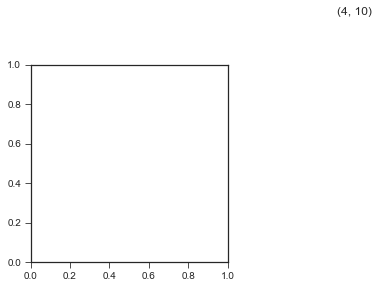

In [22]:
for m,(max_train,max_test) in enumerate(param_list):
    plt.figure(figsize=(4*np.ceil(n_trials/2),4*2))
    plt.suptitle(f'{(max_train,max_test)}')
    
    for i in range(n_trials):
        ax = plt.subplot(2,np.ceil(n_trials/2),i+1)
        model = datasets[f'{(max_train,max_test)}'][i]['CV_best_rank_index']
        
        end = model +1 
        
        subtle_swapped =np.asarray(s_fits[f'{(max_train,max_test)}'][i]).swapaxes(0,1)
        fits_swapped =np.asarray(ns_fits[f'{(max_train,max_test)}'][i]).swapaxes(0,1)

        focal_conditions = []

        interesting_locs = np.where(np.isin(test_conditions,interesting_conditions))[0]
        uninteresting_locs = np.where(~np.isin(test_conditions,interesting_conditions))[0]

        for c in range(subtle_swapped.shape[0]):
            plt.scatter([tools.jitter_point(i-0.25,0.05) for i in range(len(np.diff(subtle_swapped[c,:end])))],np.diff(subtle_swapped[c,:end]),color='lightgray',alpha=0.5,marker='.')

        for c in uninteresting_locs:
            plt.scatter([tools.jitter_point(i+0.25,0.05) for i in range(len(np.diff(fits_swapped[c,:end])))],np.diff(fits_swapped[c,:end]),color='k',alpha=0.3,marker='.')

        plt.xticks(range(fits_swapped.shape[1]-1),range(2,fits_swapped.shape[1]+2))
        plt.ylabel('Added Variance explained')

        # plt.plot(np.mean(np.diff(fits_swapped[uninteresting_locs,:],axis=1),axis=0),'k',label='Average')
        for c,col in zip(interesting_locs,interesting_conditions):
            plt.scatter([tools.jitter_point(i+0.25,0.05) for i in range(len(np.diff(fits_swapped[c,:end])))],np.diff(fits_swapped[c,:end]),
                        color=condition_colorset[col.replace('_fitness','')],marker='.',alpha=0.8,label=renamed_conditions[col.replace('_fitness','')])
        #     plt.plot(np.diff(fits_swapped[c,:]),label=renamed_conditions[col.replace('_fitness','')],color=condition_colorset[col.replace('_fitness','')],marker='o',linestyle='',alpha=0.7)
        plt.legend()
        plt.xticks(range(end-1),range(2,end+1))
        plt.ylabel('Added Variance explained')
        plt.xlabel('Component')
        # plt.yscale('log')

#         plt.savefig(f'robustness/addedVE_1456Day_{max_train}_{max_test}_unweighted.pdf',bbox_inches='tight')



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


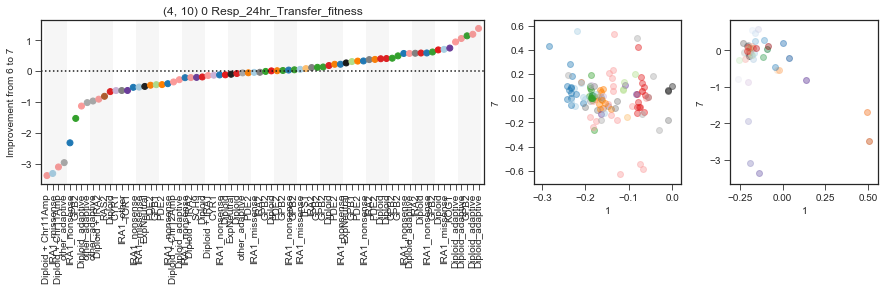

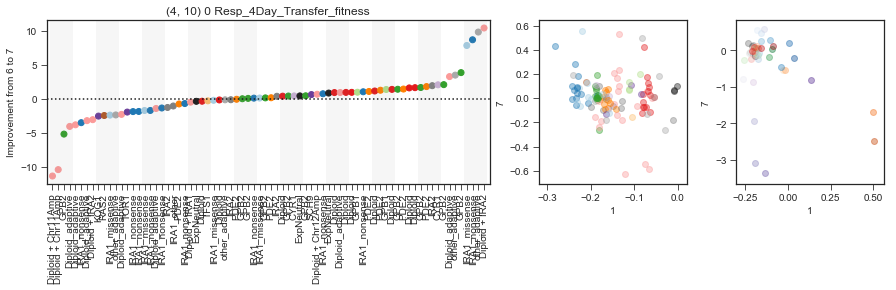

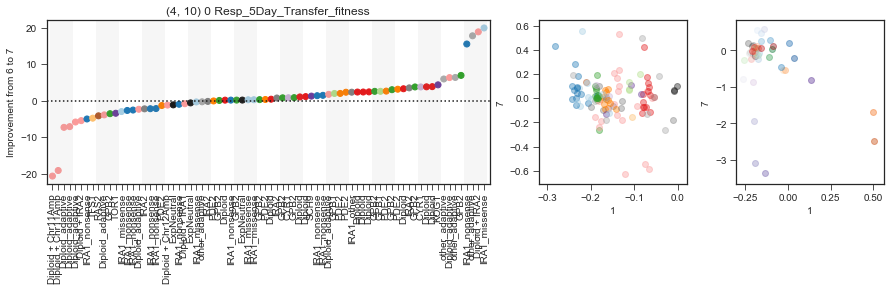

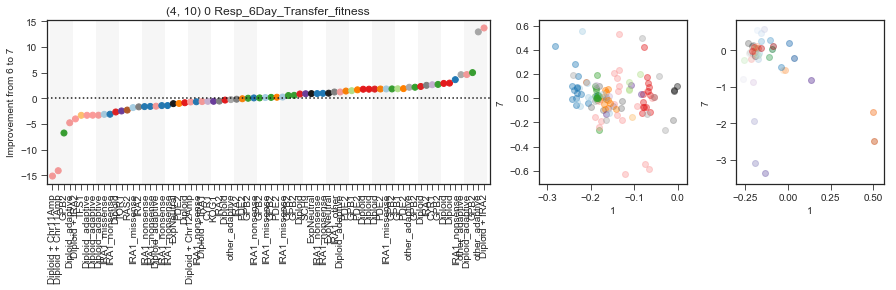

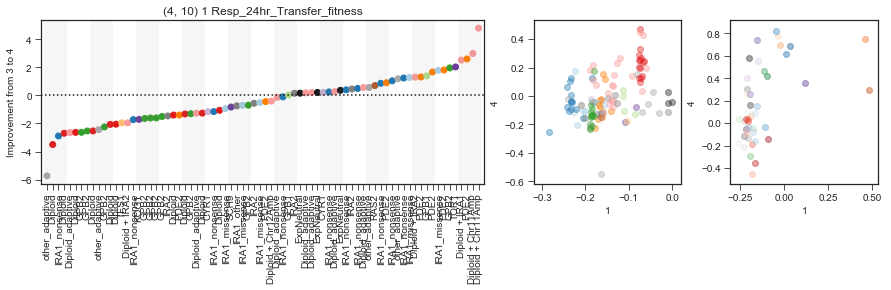

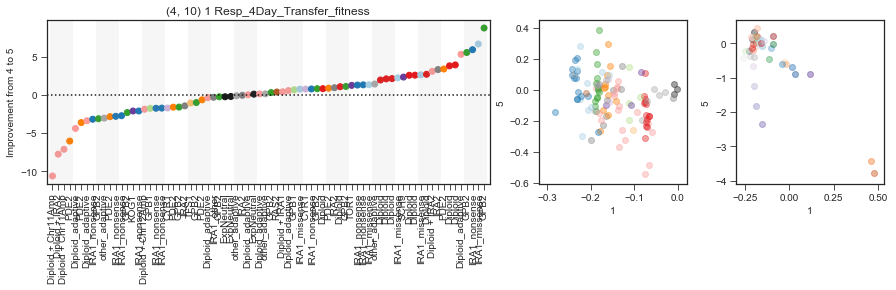

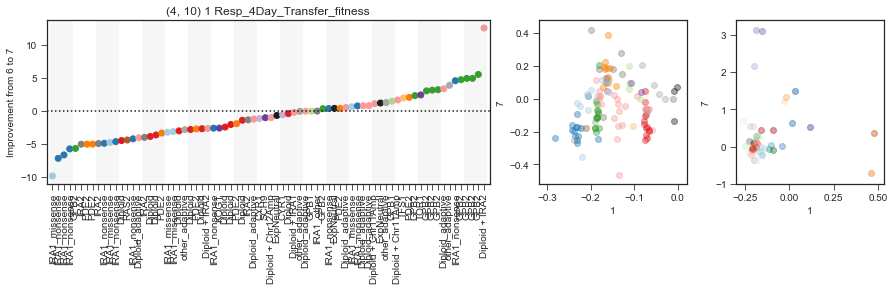

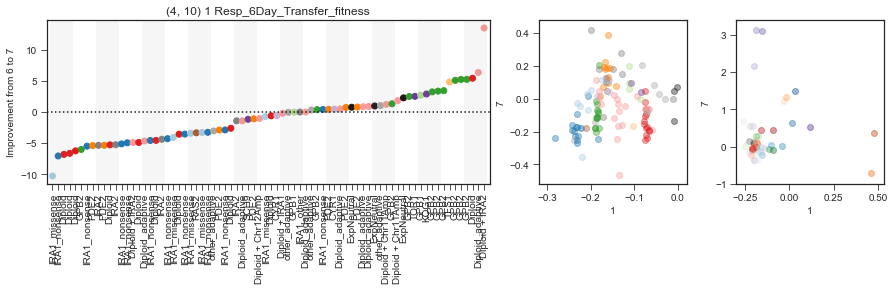

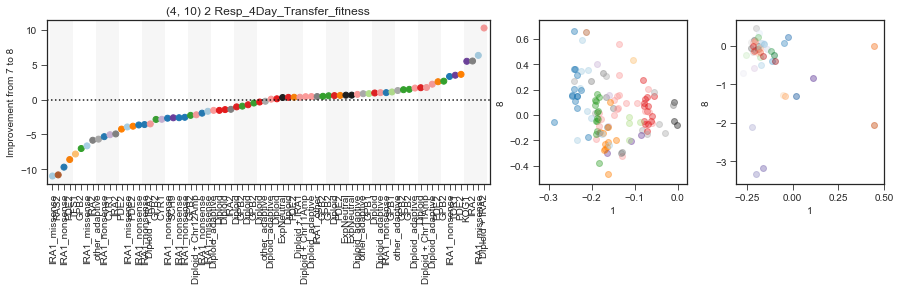

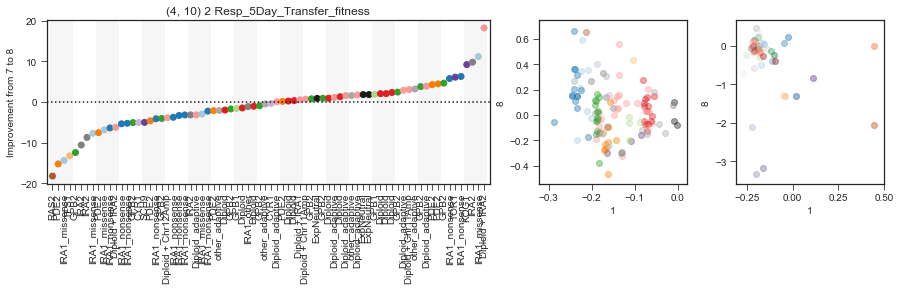

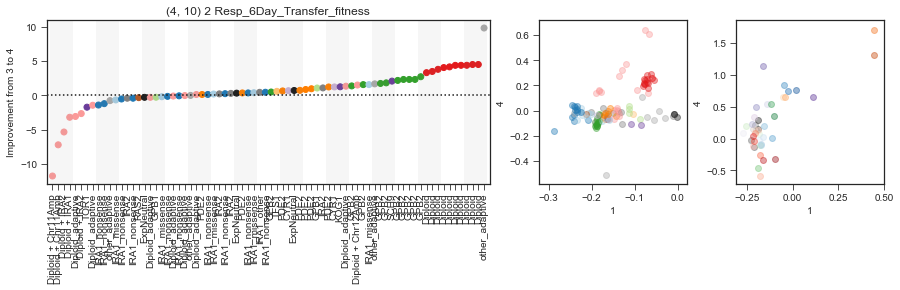

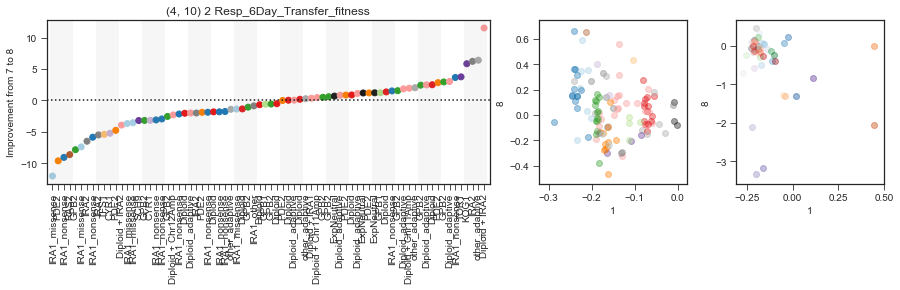

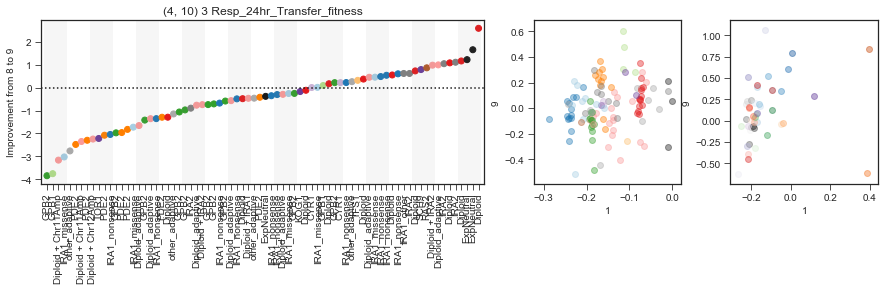

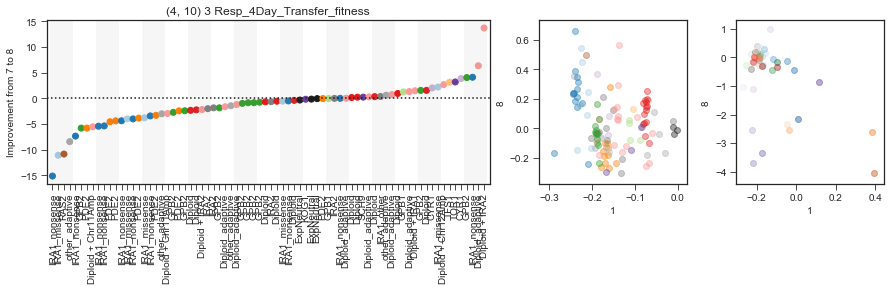

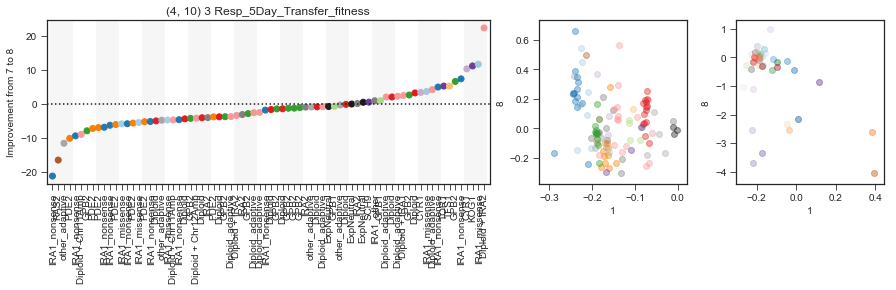

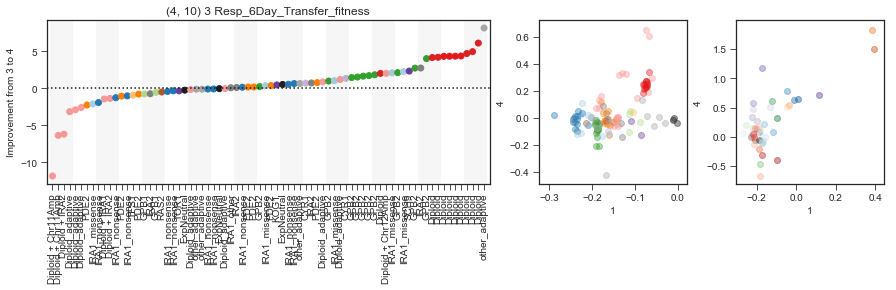

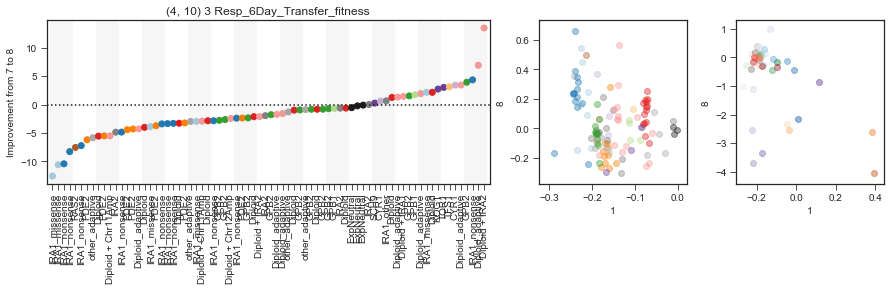

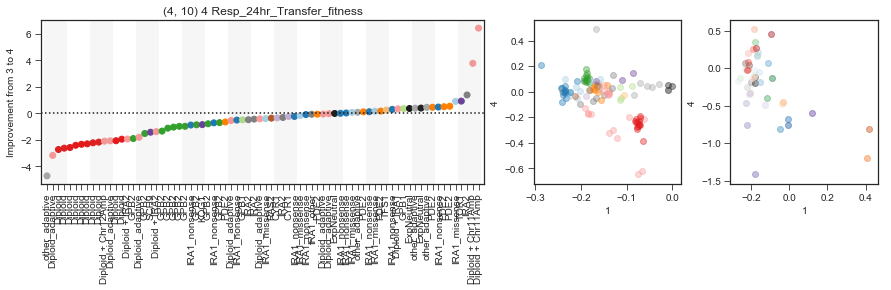

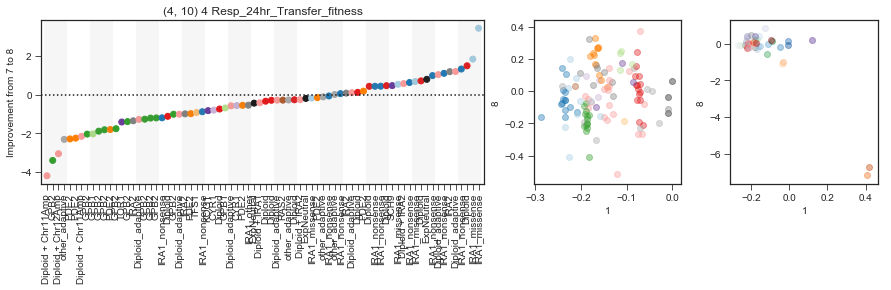

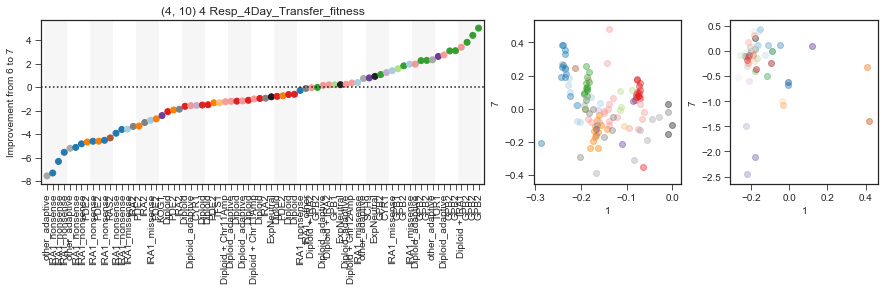

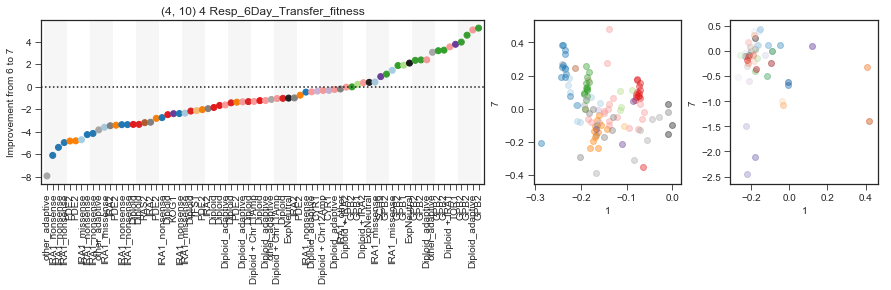

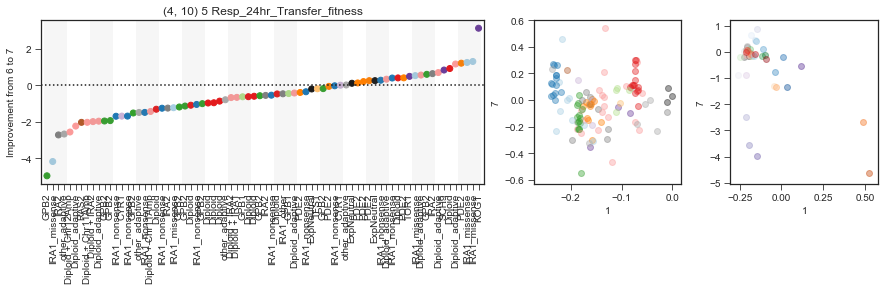

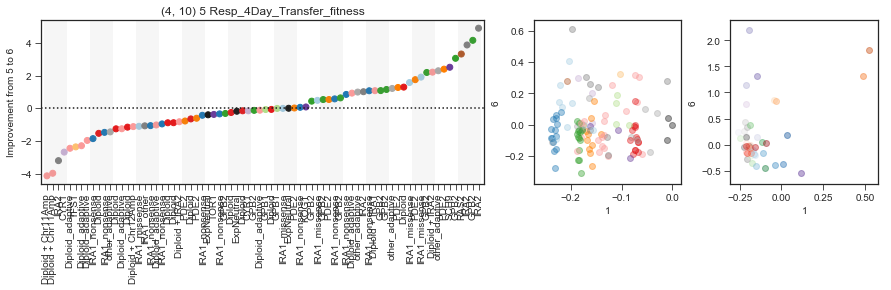

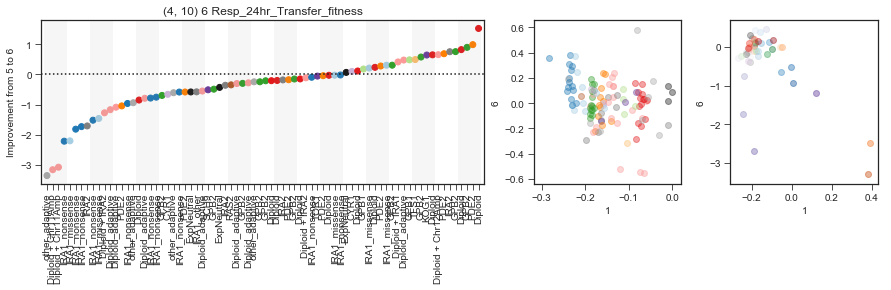

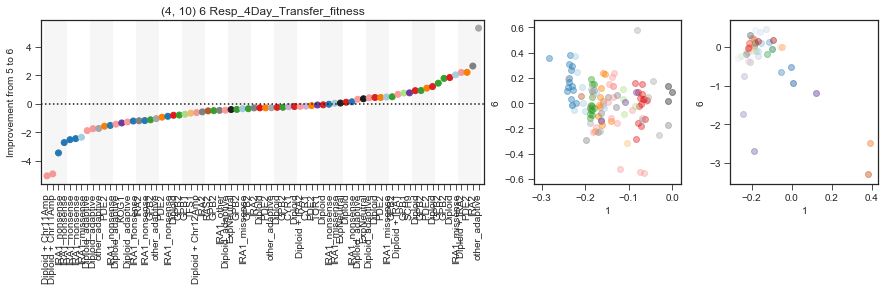

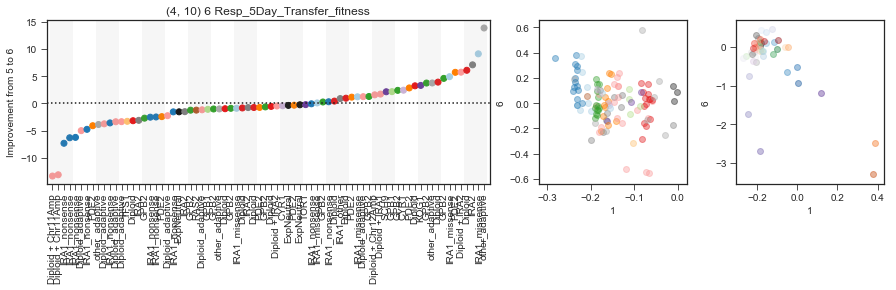

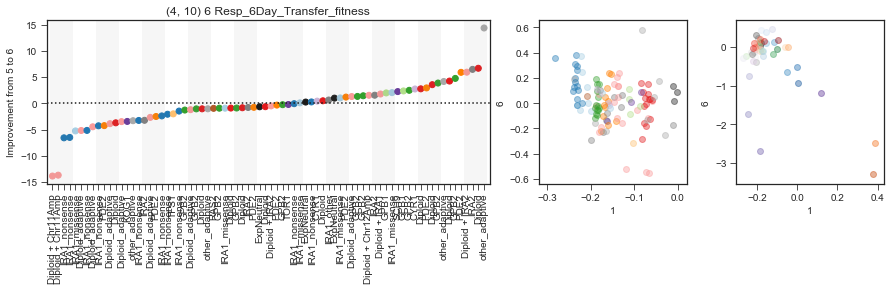

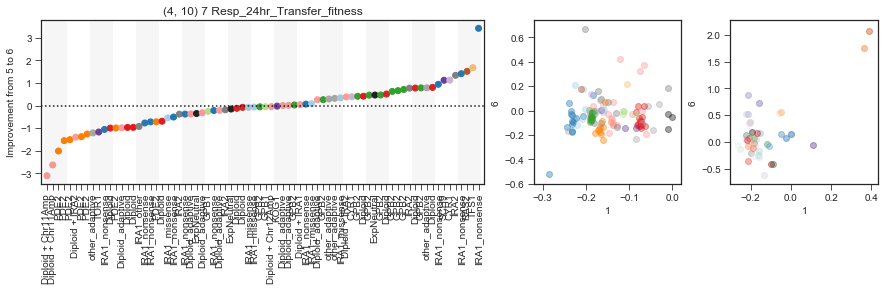

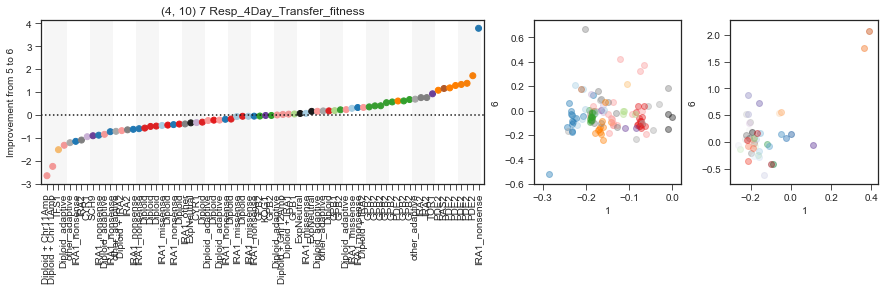

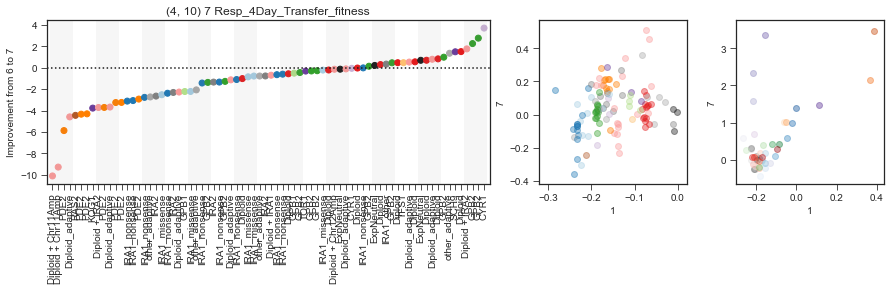

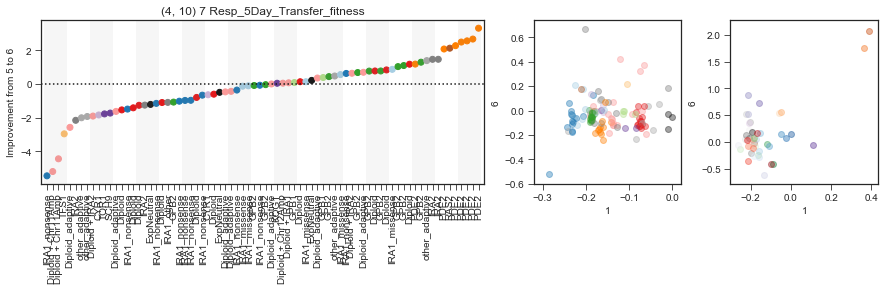

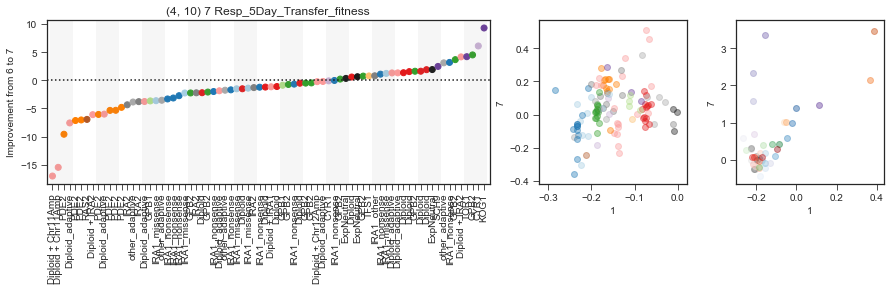

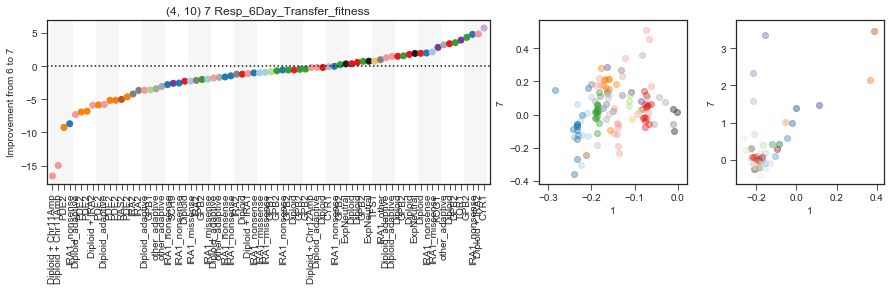

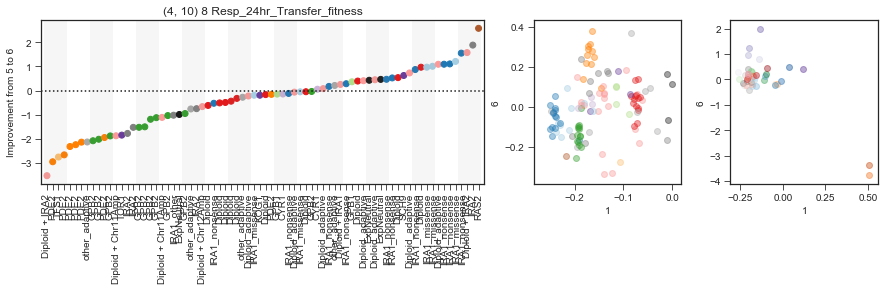

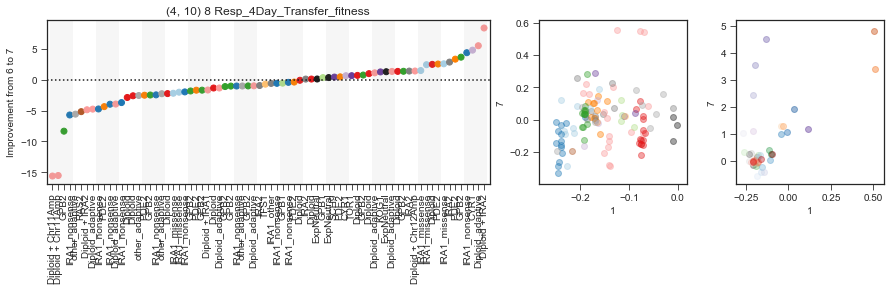

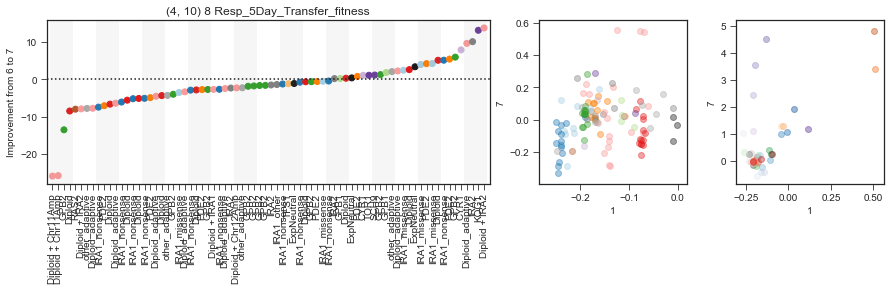

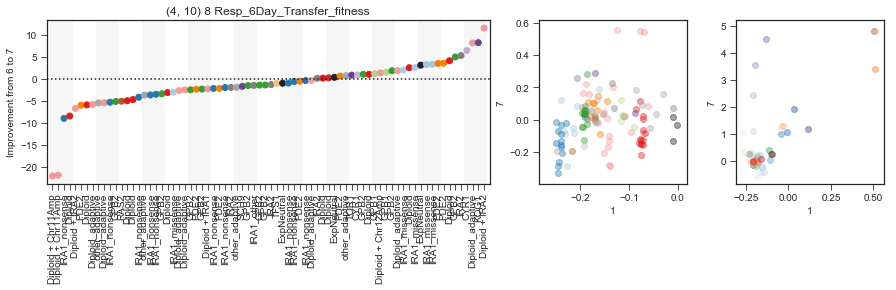

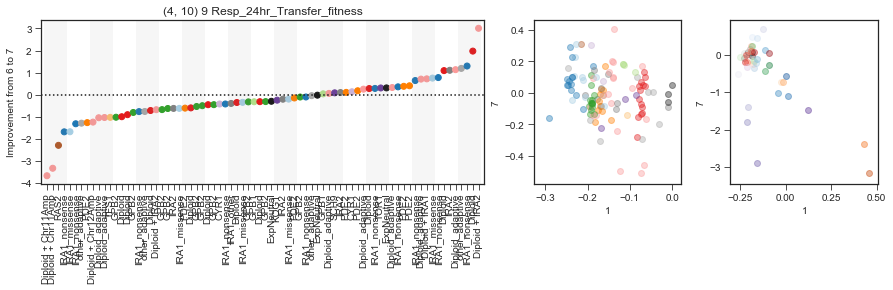

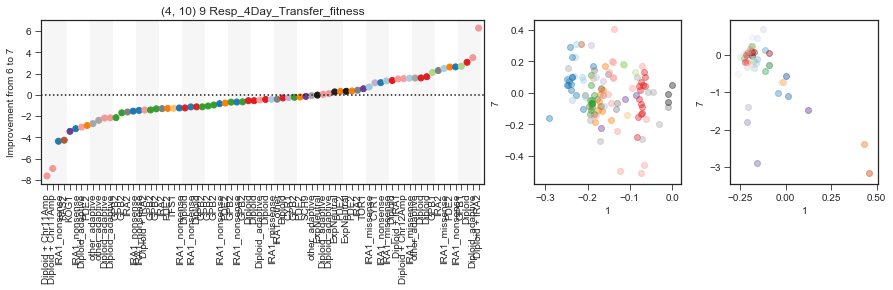

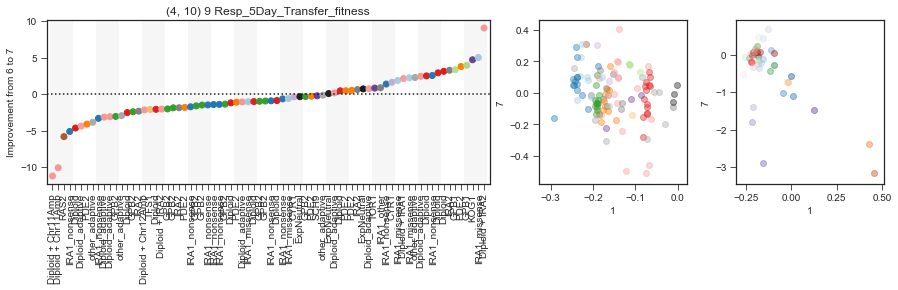

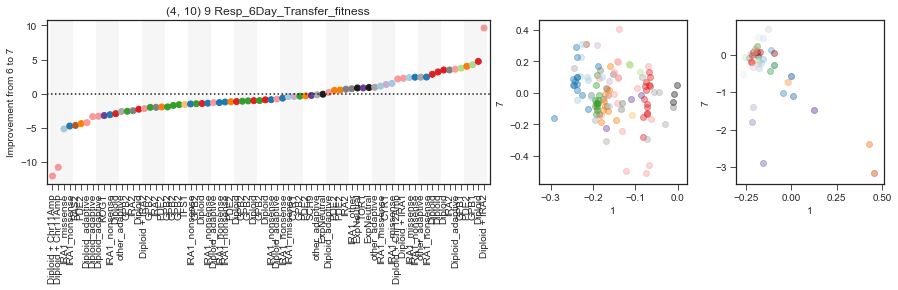

In [71]:
interesting_locs = np.where(np.isin(test_conditions,interesting_conditions))[0]
uninteresting_locs = np.where(~np.isin(test_conditions,interesting_conditions))[0]



(max_train,max_test) = param_list[1]

for trial in range(n_trials):


    dataset = datasets[f'{(max_train,max_test)}'][trial]

    train_conditions = dataset['train_conditions']
    test_conditions = dataset['test_conditions']

    train  = dataset['train']
    test = dataset['test']

    this_fitness  = dataset['this_fitness']
    this_error  = dataset['this_error']

    model = dataset['CV_best_rank_index']

    end = model +1 

    subtle_swapped =np.asarray(s_fits[f'{(max_train,max_test)}'][trial]).swapaxes(0,1)
    fits_swapped =np.asarray(ns_fits[f'{(max_train,max_test)}'][trial]).swapaxes(0,1)

    for c,condition in zip(interesting_locs,interesting_conditions):
        large_components = np.where(np.diff(fits_swapped[c,:end])[2:] > 0.1)[0]

        for component in large_components:

            model_list = [component+3-1,component+3]

            model_colors = ['k','lightgray','r']

            all_conditions = train_conditions + test_conditions

            all_bcs = sorted(list(dataset['training_bcs'])+list(dataset['testing_bcs']))

            testing_bcs = list(dataset['testing_bcs'])

            these_bcs = testing_bcs

            these_genes = this_data[this_data['barcode'].isin(these_bcs)]['mutation_type'].values
            gene_bc = np.asarray([f'{gene} ({bc})' for bc,gene in zip(these_bcs,these_genes)])
            gene_bc = np.asarray([f'{gene}' for bc,gene in zip(these_bcs,these_genes)])

            condition_loc = np.where(np.isin(all_conditions,condition))[0][0]

            this_f = this_fitness[np.where(np.isin(all_bcs,these_bcs))[0]]
            this_e = this_error[np.where(np.isin(all_bcs,these_bcs))[0]]

            fits = []

            for m,model in enumerate(model_list):

                new_mut_locs = dataset['mut_locs'][model][test[1]]
                old_cond_locs = dataset['cond_locs'][model][train[0]]
                new_cond_locs = dataset['cond_locs'][model][test[0]]   
                these_sigmas = dataset['dimension_weights'][model]
                these_sigmas = these_sigmas[:model+1,:model+1]

                new_fits = [np.abs(np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T))[bc,condition_loc-old_cond_locs.shape[0]]-this_f[bc,condition_loc])/this_e[bc,condition_loc] for bc in range(len(these_bcs))]

                sorting  = np.argsort(new_fits)

                fits.append(new_fits)

        #         data = (np.asarray(fits[0])-np.asarray(fits[1]))/(np.asarray(fits[0]))
        #         data = (np.asarray(fits[0])-np.asarray(fits[1]))
            data = np.asarray(fits[1])-np.asarray(fits[0])
            sorting = np.argsort(data)
            data = data[sorting]
            sorted_genes = these_genes[sorting]

            fig = plt.figure(figsize=(15,3))
            gs = GridSpec(1, 3, width_ratios=[9, 3,3])
            ax1 = fig.add_subplot(gs[0])
            
            plt.title(f'{(max_train,max_test)} {trial} {condition}')
            
#             plt.subplot(122)

            plt.scatter(range(len(data)),data,marker='o',color=[mutant_colorset[gene] for gene in sorted_genes])


            plt.axhline(0,color='k',linestyle=':')
            plt.xticks(range(len(these_bcs)),gene_bc[sorting],rotation=90)

            ymin = -1.0
            ymax = 4.0
            plt.ylabel(f'Improvement from {model_list[0]+1} to {model_list[1]+1}')

            plt.xlim(-1,len(these_bcs))
            ymin,ymax = plt.ylim()
            

            for i in range(int(np.ceil(len(these_bcs)/4))):
                if (i % 2) == 0:
                    # print(i)
                    rect = matplotlib.patches.Rectangle((0+4*i-0.5,ymin),4,ymax-ymin,
                                                    linewidth=0,edgecolor='gray',facecolor='gray',alpha=0.07)
                    plt.gca().add_patch(rect)
                    
            
            
            ax2 = fig.add_subplot(gs[1])
            
#             model_list = [0,component+3]
            
            mut_locs = dataset['mut_locs'][component+3]
        
            these_genes = this_data[this_data['barcode'].isin(all_bcs)]['mutation_type'].values
            
            for bc in range(mut_locs.shape[0]):
                plt.scatter(mut_locs[bc,0],mut_locs[bc,component+3],color=mutant_colorset[these_genes[bc]],marker='o',alpha=0.4)
            
            plt.xlabel(1)
            plt.ylabel(component+4)
            
            ax3 = fig.add_subplot(gs[2])
            
#             model_list = [0,component+3]
            
            cond_locs = dataset['cond_locs'][component+3]
        
            these_genes = this_data[this_data['barcode'].isin(all_bcs)]['mutation_type'].values
            
            for c in range(cond_locs.shape[0]):
                plt.scatter(cond_locs[c,0],cond_locs[c,component+3],color=condition_colorset[all_conditions[c].replace('_fitness','')],marker='o',alpha=0.4)
            
            plt.xlabel(1)
            plt.ylabel(component+4)

In [ ]:
dataset = datasets['subtle_to_strong_wothers']
n_perms = 100
weighted= True
ymax = 1.0
ymin = -1.0

all_guesses = dataset['CV_all_guesses']
both_old = dataset['both_old']
dhats = dataset['dhats']
this_fitness = dataset['this_fitness']
this_error = dataset['this_error']
train  = dataset['train']
test = dataset['test']
both_new = dataset['both_new']
guesses = dataset['guesses']
model = dataset['CV_best_rank_index']
test_conditions  = dataset['test_conditions']
train_conditions = dataset['train_conditions']


nonsubtle_fits = []
subtle_fits = []
overall_subtle = []
overall_nonsubtle = []

model_list = [0,]
    model_colors = ['k','lightgray','r']

    all_conditions = train_conditions + test_conditions


    all_bcs = sorted(list(dataset['training_bcs'])+list(dataset['testing_bcs']))

    testing_bcs = list(dataset['testing_bcs'])

    these_bcs = testing_bcs

    these_genes = this_data[this_data['barcode'].isin(these_bcs)]['mutation_type'].values
    gene_bc = np.asarray([f'{gene} ({bc})' for bc,gene in zip(these_bcs,these_genes)])
    gene_bc = np.asarray([f'{gene}' for bc,gene in zip(these_bcs,these_genes)])


    for condition in interesting_conditions:

        condition_loc = np.where(np.isin(all_conditions,condition))[0][0]

        this_f = this_fitness[np.where(np.isin(all_bcs,these_bcs))[0]]
        this_e = this_error[np.where(np.isin(all_bcs,these_bcs))[0]]



        fits = []

        for m,model in enumerate(model_list):

            new_mut_locs = dataset['mut_locs'][model][test[1]]
            old_cond_locs = dataset['cond_locs'][model][train[0]]
            new_cond_locs = dataset['cond_locs'][model][test[0]]   
            these_sigmas = dataset['dimension_weights'][model]
            these_sigmas = these_sigmas[:model+1,:model+1]

            new_fits = [np.abs(np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T))[bc,condition_loc-old_cond_locs.shape[0]]-this_f[bc,condition_loc])/this_e[bc,condition_loc] for bc in range(len(these_bcs))]

            sorting  = np.argsort(new_fits)

            fits.append(new_fits)

        data = (np.asarray(fits[1])-np.asarray(fits[2]))/(np.asarray(fits[1]))
        data = (np.asarray(fits[1])-np.asarray(fits[2]))
        data = np.asarray(fits[2])-np.asarray(fits[1])
        sorting = np.argsort(data)
        data = data[sorting]
        sorted_genes = these_genes[sorting]

        plt.figure(figsize=(12,6))
        plt.subplot(211)
        plt.title(renamed_conditions[condition.replace('_fitness','')])

        for m,model in enumerate(model_list):
            sorted_fits = np.asarray(fits[m])[sorting]
            plt.scatter(range(len(sorted_fits)),sorted_fits,marker='o',color=model_colors[m],label=f'{model+1} components')

        plt.xticks([])
        plt.legend()

        plt.xlim(-1,len(these_bcs))
        ymin,ymax = plt.ylim()

        for i in range(int(np.ceil(len(these_bcs)/4))):
            if (i % 2) == 0:
                # print(i)
                rect = matplotlib.patches.Rectangle((0+4*i-0.5,ymin),4,ymax-ymin,
                                                linewidth=0,edgecolor='gray',facecolor='gray',alpha=0.07)

                plt.gca().add_patch(rect)

        plt.subplot(212)

        plt.scatter(range(len(data)),data,marker='o',color=[mutant_colorset[gene] for gene in sorted_genes])


        plt.axhline(0,color='k',linestyle=':')
        plt.xticks(range(len(these_bcs)),gene_bc[sorting],rotation=90)

        ymin = -1.0
        ymax = 4.0
        plt.ylabel(f'Improvement from {model_list[1]+1} to {model_list[2]+1}')

        plt.xlim(-1,len(these_bcs))
        ymin,ymax = plt.ylim()

        for i in range(int(np.ceil(len(these_bcs)/4))):
            if (i % 2) == 0:
                # print(i)
                rect = matplotlib.patches.Rectangle((0+4*i-0.5,ymin),4,ymax-ymin,
                                                linewidth=0,edgecolor='gray',facecolor='gray',alpha=0.07)

                plt.gca().add_patch(rect)

    #     toohigh = np.where(data>ymax)[0]
    #     low_counter = 0
    #     for entry in toohigh:
    #         plt.annotate("", xy=(entry, ymax), xytext=(entry, ymax-0.1*(ymax-ymin)),arrowprops=dict(arrowstyle="->",lw=1.5,color=mutant_colorset[sorted_genes[entry]]))
        plt.savefig(f'improvement_by_mutant_{condition}_{model_list[1]+1}_to_{model_list[2]+1}.pdf',bbox_inches='tight')

In [78]:
def SVD_predictions_train_test_weighted(data,train,test,
                                        permuted_mutants=False,permuted_conditions=False,
                                        mse=False,by_condition=False,by_mutant=False,error=None,likelihood=False,
                                        weighted_by_type=True,types=None):
    
    """ 
    Bi-cross validation using multiple folds of data matrix. 

    Method from Owen and Perry 2009.

    For each fold, we have the following data matrix:

                        "new conditions"  "old conditions"
    "new mutants"              A                  B
    "old mutants"              C                  D

    We first perform SVD on the D sub-matrix (using only old mutants and old conditions).
    For every pseudo inverse rank k approximation of D (denoted by D_k^+), we matrix multiply B * D_k^+ * C which gives the best estimate for A from the D_k approximation.

    We then evaluate prediction ability use the residual (eqn 3.3 from Owen and Perry 2009):

        A - B * D_k^+ * C 

    """

    train_c = train[0]
    train_m = train[1]

    test_c = test[0]
    test_m = test[1]

    this_data = data
    
    assert len(train_m) + len(test_m) == this_data.shape[0]
    assert len(train_c) + len(test_c) == this_data.shape[1]

    max_rank = min([len(train_c),len(train_m)])

    fits_by_condition = []
    fits_by_mutant = []
    mean_fits =[]

    if permuted_mutants and permuted_conditions:
        this_data = copy.copy(data)
        this_data[train_m,train_c] = np.random.permutation(this_data[train_m,train_c].ravel()).reshape(len(train_m),len(train_c))
        subset = this_data[np.repeat(train_m,len(train_c)),np.tile(train_c,len(train_m))].ravel()

    elif permuted_mutants:
        this_data = copy.copy(data)
        for mut in train_m:
            this_data[mut,train_c] = np.random.permutation(this_data[mut,train_c])

    elif permuted_conditions:

        this_data = np.swapaxes(copy.copy(data),0,1)
        for cond in train_c:
            this_data[cond,train_m] = np.random.permutation(this_data[cond,train_m])
        this_data = np.swapaxes(this_data,0,1)

    else:
        this_data = copy.copy(data)
        
    if weighted_by_type:
        train_count,train_inv_count = count_matrix(types[train_m],this_data[train_m,:])
        test_count,test_inv_count = count_matrix(types[test_m],this_data[test_m,:])
        
        order = np.argsort(np.concatenate((train_m,test_m)))
        
        all_count = np.concatenate((train_count,test_count))[order]
        all_inv_count = np.concatenate((train_inv_count,test_inv_count))[order]
        
        weighted_data = np.multiply(all_inv_count,this_data)
    else:
        train_count = np.ones(this_data[train_m,:].shape)
        train_inv_count = np.ones(this_data[train_m,:].shape)
        test_count = np.ones(this_data[test_m,:].shape)
        test_inv_count = np.ones(this_data[test_m,:].shape)
        
        order = np.argsort(np.concatenate((train_m,test_m)))
        
        all_count = np.concatenate((train_count,test_count))[order]
        all_inv_count = np.concatenate((train_inv_count,test_inv_count))[order]
        
        weighted_data = copy.copy(this_data)
        
    both_old = weighted_data[np.repeat(train_m,len(train_c)),np.tile(train_c,len(train_m))].reshape(len(train_m),len(train_c))
    both_old_unweighted = this_data[np.repeat(train_m,len(train_c)),np.tile(train_c,len(train_m))].reshape(len(train_m),len(train_c))

    U2, s2, V2 = np.linalg.svd(both_old)
    
    mut_new = weighted_data[np.repeat(test_m,len(train_c)),np.tile(train_c,len(test_m))].reshape(len(test_m),len(train_c))  
    cond_new = weighted_data[np.repeat(train_m,len(test_c)),np.tile(test_c,len(train_m))].reshape(len(train_m),len(test_c))
    both_new = weighted_data[np.repeat(test_m,len(test_c)),np.tile(test_c,len(test_m))].reshape(len(test_m),len(test_c))
    
    both_new_unweighted = this_data[np.repeat(test_m,len(test_c)),np.tile(test_c,len(test_m))].reshape(len(test_m),len(test_c))

    if likelihood:
        both_new_error = error[np.repeat(test_m,len(test_c)),np.tile(test_c,len(test_m))].reshape(len(test_m),len(test_c))

    mean_mutant_prediction = np.repeat(np.mean(mut_new,axis=1),len(test_c)).reshape(len(test_m),len(test_c))

    if mse:
        mean_fits = np.sum(np.square(both_new-mean_mutant_prediction))
    elif likelihood:
        mean_fits = log_likelihood(mean_mutant_prediction,both_new,both_new_error)
    else: 
        mean_fits = tools.var_explained(both_new,mean_mutant_prediction)[0]

    mean_fits_by_condition = []

    if by_condition:
        for k in range(len(test_c)):
            if mse:
                mean_fits_by_condition.append(np.sum(np.square(both_new[:,k]-mean_mutant_prediction[:,k])))
            elif likelihood:
                mean_fits_by_condition.append(log_likelihood(mean_mutant_prediction[:,k],both_new[:,k],both_new_error[:,k]))
            else:
                mean_fits_by_condition.append(tools.var_explained(both_new[:,k],mean_mutant_prediction[:,k])[0])


    fit_by_rank = []
    guesses = []
    dhats = []
    for rank in range(1,max_rank+1):

        new_s = np.asarray(list(s2[:rank]) + list(np.zeros(s2[rank:].shape)))
        S2 = np.zeros((U2.shape[0],V2.shape[0]))
        S2[:min([U2.shape[0],V2.shape[0]]),:min([U2.shape[0],V2.shape[0]])] = np.diag(new_s)

        D_hat = np.dot(U2[:,:rank],np.dot(S2,V2)[:rank,:])
        A_hat = test_count[:,:len(test_c)]*np.dot(mut_new,np.dot(np.linalg.pinv(D_hat),cond_new))

        dhats.append(D_hat)

        guesses.append(A_hat)
        if mse:
            fit_by_rank.append(np.sum(np.square(both_new_unweighted-A_hat)))

        else:
            fit_by_rank.append(tools.var_explained(both_new_unweighted,A_hat)[0])

        fits_by_condition.append([])
        fits_by_mutant.append([])

        if by_condition:
            for k in range(len(test_c)):
                if mse:
                    fits_by_condition[rank-1].append(np.sum(np.square(both_new[:,k]-A_hat[:,k])))
                elif likelihood:
                    fits_by_condition[rank-1].append(log_likelihood(mean_mutant_prediction[:,k],both_new[:,k],both_new_error[:,k]))
                else:
                    fits_by_condition[rank-1].append(tools.var_explained(both_new_unweighted[:,k],A_hat[:,k])[0])
        if by_mutant: 
            for j in range(len(test_m)):
                if mse:
                    fits_by_mutant[rank-1].append(np.sum(np.square(both_new[j,:]-A_hat[j,:])))
                elif likelihood:
                    fits_by_mutant[rank-1].append(log_likelihood(mean_mutant_prediction[j,:],both_new[j,:],both_new_error[j,:]))
                else:
                    fits_by_mutant[rank-1].append(tools.var_explained(both_new_unweighted[j,:],A_hat[j,:])[0])

        
    return fit_by_rank, fits_by_condition, fits_by_mutant, mean_fits, mean_fits_by_condition, guesses, dhats, both_old

In [59]:
def var_explained_weighted_by_type(data,model,types,exceptions={'adaptive_other':1,'Diploid_adaptive':1}):

    counts = np.unique(np.asarray(types),return_counts=True)

    like_type_count_dict = {mut_type:count for mut_type,count in zip(*counts)}

    like_type_counts = [like_type_count_dict[mut_type] if mut_type not in exceptions.keys() else exceptions[mut_type] for mut_type in types]

    if len(data.shape) > 1:
        like_type_counts = np.repeat(like_type_counts,data.shape[1]).reshape(len(like_type_counts),data.shape[1])

    ss_res = np.sum((data-model)**2/like_type_counts)
    ss_tot = np.sum((data-np.mean(data))**2/like_type_counts)

    return 1 - ss_res/ss_tot, ss_res, ss_tot

In [15]:
def count_matrix(types,data,exceptions={'adaptive_other':1,'Diploid_adaptive':1}):
    
    counts = np.unique(np.asarray(types),return_counts=True)

    like_type_count_dict = {mut_type:count for mut_type,count in zip(*counts)}

    like_type_counts = [like_type_count_dict[mut_type] if mut_type not in exceptions.keys() else exceptions[mut_type] for mut_type in types]
    
    inv_like_type_counts = np.reciprocal(like_type_counts,dtype=np.float)

    if len(data.shape) > 1:
        like_type_counts = np.repeat(like_type_counts,data.shape[1]).reshape(len(like_type_counts),data.shape[1])
        inv_like_type_counts = np.repeat(inv_like_type_counts,data.shape[1]).reshape(len(inv_like_type_counts),data.shape[1])
    
    return like_type_counts,inv_like_type_counts

In [16]:
the_data = this_data[this_data['barcode'].isin(training_bcs)]
types = the_data['mutation_type'].values
the_data = the_data[sorted_m3_cols]

counts,inv_counts = count_matrix(types,the_data)

weighted_data = np.multiply(the_data,inv_counts)


In [79]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')



train_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])
test_cols = list(sorted_nonm3_cols[first_nonsubtle:])

fitness_cols = train_cols + test_cols

fitness = this_data[fitness_cols].values

n_mutants = fitness.shape[0]
n_conditions = fitness.shape[1]

train_conditions = train_cols
train_locs = np.where(np.isin(fitness_cols,train_conditions))[0]

test_conditions = test_cols
test_locs = np.where(np.isin(fitness_cols,test_conditions))[0]

all_locs = sorted(list(train_locs)+list(test_locs))

used_mutants = [bc for bc in this_data['barcode'].values if bc in (list(training_bcs) + list(testing_bcs))]

all_mut_locs =sorted(list(np.where(np.isin(this_data['barcode'].values,used_mutants))[0]))

this_fitness = fitness[all_mut_locs,:][:,all_locs]
new_train_locs = np.where(np.isin(all_locs,train_locs))[0]
new_test_locs = np.where(np.isin(all_locs,test_locs))[0]  

train = [new_train_locs,np.where(np.isin(used_mutants,training_bcs))[0]]
test = [new_test_locs,np.where(np.isin(used_mutants,testing_bcs))[0]]

train_c = train[0]
train_m = train[1]

test_c = test[0]
test_m = test[1]

this_data = this_data[this_data['barcode'].isin(used_mutants)]
types = this_data['mutation_type'].values
# this_data = this_data[list(sorted_m3_cols)+list(sorted_nonm3_cols)].values
print(this_fitness.shape)

a = SVD_predictions_train_test_weighted(this_fitness,train,test,weighted_by_type=False,types=types)
b = tools.SVD_predictions_train_test(this_fitness,train,test)
c = SVD_predictions_train_test_weighted(this_fitness,train,test,weighted_by_type=True,types=types)



(115, 45)


In [64]:
c

16

In [82]:
c

([0.19527701182841484,
  0.6696562843544978,
  0.7161874472374796,
  0.7199486905477857,
  0.6916200258199743,
  0.7000613095588939,
  0.7011721228390948,
  0.718884333434109,
  0.7350051829952078,
  0.7368271743400794,
  0.7226607813944499,
  0.7230471513760546,
  0.7219251061111961,
  0.7131097850499838,
  0.6798474033421378,
  0.6759022677614608,
  0.6439068842881772,
  0.5838796917477431,
  0.5448344645402791,
  0.5515977700486654,
  0.48921044365112887,
  0.41905478077565417,
  0.2732046744675001,
  0.14611848717885478,
  0.11525166929796249],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 0.020202590783575003,
 [],
 [array([[ 1.25608241,  1.22576268,  0.68342324, ...,  0.02142235,
          -0.49129433, -0.52379639],
         [ 

In [31]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')


train_c = train[0]
train_m = train[1]

test_c = test[0]
test_m = test[1]

this_data = this_data[this_data['barcode'].isin(training_bcs+testing_bcs)]
types = this_data['mutation_type'].values

this_data = this_data[list(sorted_m3_cols)+list(sorted_nonm3_cols)].values

train_count,train_inv_count = count_matrix(types[train_m],this_data[train_m,:])
test_count,test_inv_count = count_matrix(types[test_m],this_data[test_m,:])

order = np.argsort(np.concatenate((train_m,test_m)))

all_count = np.concatenate((train_count,test_count))[order]
all_inv_count = np.concatenate((train_inv_count,test_inv_count))[order]

weighted_data = np.multiply(all_inv_count,this_data)

order = np.argsort(np.concatenate((train_m,test_m)))
        
all_count = np.concatenate((train_count,test_count))[order]

In [37]:
all_count.shape

(115, 45)

In [38]:
train_count.shape

(42, 45)

In [34]:
test_count

array([[10, 10, 10, ..., 10, 10, 10],
       [ 6,  6,  6, ...,  6,  6,  6],
       [ 6,  6,  6, ...,  6,  6,  6],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [10, 10, 10, ..., 10, 10, 10],
       [ 4,  4,  4, ...,  4,  4,  4]])

In [40]:
train_m.shape

(42,)

In [7]:
test_m

NameError: name 'test_m' is not defined